In [2]:
import numpy
import numpy as np
import torch
from torch import nn
import random
import matplotlib.pyplot as plt
from ripser import Rips, ripser
from persim import plot_diagrams
import math
from sklearn import preprocessing
from tadasets import torus, sphere
import persim

# Import Scikit-Learn tools
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


def sliced_wasserstein(PD1, PD2, M=50):
    """ Implementation of Sliced Wasserstein distance as described in
        Sliced Wasserstein Kernel for Persistence Diagrams by Mathieu Carriere, Marco Cuturi, Steve Oudot (https://arxiv.org/abs/1706.03358)


        Parameters
        -----------

        PD1: np.array size (m,2)
            Persistence diagram
        PD2: np.array size (n,2)
            Persistence diagram
        M: int, default is 50
            Iterations to run approximation.

        Returns
        --------
        sw: float
            Sliced Wasserstein distance between PD1 and PD2
    """

    diag_theta = torch.tensor([np.cos(0.25 * np.pi), np.sin(0.25 * np.pi)], dtype=torch.float32, device=device)

    l_theta1 = [torch.dot(diag_theta, torch.tensor(x, dtype=torch.float32, device=device)) for x in PD1]
    l_theta2 = [torch.dot(diag_theta, torch.tensor(x, dtype=torch.float32, device=device)) for x in PD2]

    if (len(l_theta1) != PD1.shape[0]) or (len(l_theta2) != PD2.shape[0]):
        raise ValueError("The projected points and origin do not match")

    PD_delta1 = [torch.tensor([torch.sqrt(x ** 2 / 2.0)] * 2, dtype=torch.float32, device=device) for x in l_theta1]
    PD_delta2 = [torch.tensor([torch.sqrt(x ** 2 / 2.0)] * 2, dtype=torch.float32, device=device) for x in l_theta2]

    # i have the input now to compute the sw
    sw = torch.tensor(0, dtype=torch.float32, device=device, requires_grad=True)
    theta = 0.5
    step = 1.0 / M
    for i in range(M):
        l_theta = torch.tensor(
            [np.cos(theta * np.pi), np.sin(theta * np.pi)], dtype=torch.float32, device=device)

        V1 = torch.tensor([torch.dot(l_theta, torch.tensor(x, dtype=torch.float32, device=device)) for x in PD1],
                          dtype=torch.float32) + torch.tensor([torch.dot(l_theta, x) for x in
                                                               PD_delta2], dtype=torch.float32)
        V2 = torch.tensor([torch.dot(l_theta, torch.tensor(x, dtype=torch.float32, device=device)) for x in PD2],
                          dtype=torch.float32) + torch.tensor([torch.dot(l_theta, x) for x in
                                                               PD_delta1], dtype=torch.float32)
        V1.sort()
        V2.sort()
        sw = torch.add(sw, step * torch.sum(torch.abs(V1 - V2)))
        theta += step

    return sw


def plot_data_ae(data, anormal):
    x = []
    y = []
    x_ae = []
    y_ae = []
    fig, axis = plt.subplots(1)
    for input, target in zip(data, anormal):
        i = input.detach().cpu().numpy()
        t = target.detach().cpu().numpy()
        for j in range(0, len(i), 2):
            x.append(i[j])
            y.append(i[j + 1])
            x_ae.append(t[j])
            y_ae.append(t[j + 1])
    plt.scatter(x, y, color='green', s=2)
    plt.scatter(x_ae, y_ae, color='red', s=3)
    plt.show()


# Only take the 4 biggest points
def transform_data(data_array):
    vec = []
    data_array = data_array['dgms']
    for i in range(len(data_array) - 1, -1, -1):
        array = data_array[i]
        for j in range(len(array) - 1, -1, -2):
            if array[j][1] == float('inf'):
                continue
            vec.append(array[j][0] * i + 1)
            vec.append(array[j][1] * i + 1)
            if len(vec) == 10:
                print("hi")
                return vec


def sample_circle(amount_samples):
    sample = []
    for i in range(amount_samples):
        r = 1 * math.sqrt(random.random())
        theta = random.random() * 2 * math.pi
        sample.append((r * math.cos(theta), r * math.sin(theta)))

    return np.array(sample)


def sample_torus(amount_samples):
    sample = []
    for i in range(amount_samples):
        U = random.random()
        R = math.sqrt(U * (0.5 ** 2) + (1 - U) * (1 ** 2))
        theta = 360 * random.random()
        sample.append((R * math.cos(theta), R * math.sin(theta)))

    return np.array(sample)


def my_plot(epochs, loss):
    plt.plot(epochs, loss)


def plot(trainer):
    figure, axes = plt.subplots()
    uc_3 = plt.Circle(trainer.c, trainer.R, fill=False)

    new_x = []
    new_y = []

    for data in tensors_circle:
        map = dsvdd.forward(data).cpu().detach().numpy()
        new_x.append(map[0])
        new_y.append(map[1])

    an_x = []
    an_y = []

    for outlier in tensors_torus:
        outlier_pos = dsvdd.forward(outlier).cpu().detach().numpy()
        an_x.append(outlier_pos[0])
        an_y.append(outlier_pos[1])

    center = dsvdd_trainer.c.cpu().detach().numpy()
    plt.scatter(new_x, new_y,
                color="green", s=5)
    plt.scatter(an_x, an_y,
                color="red", s=5)
    plt.scatter(center[0], center[1],
                color="blue", s=5)
    axes.add_artist(uc_3)
    plt.gca().add_patch(uc_3)
    plt.axis('equal')
    plt.show()


#data_torus = torus(n=100, c=2, a=1)
samples = torus(200, c=2, a=1)
#samples = sample_torus(200)

#plt.scatter(samples[:, 0], samples[:, 1], color="red")

cuda


In [3]:
samples_circle = sphere(n=200, r=2)
#plt.scatter(samples_circle[:, 0], samples_circle[:, 1], color="red")

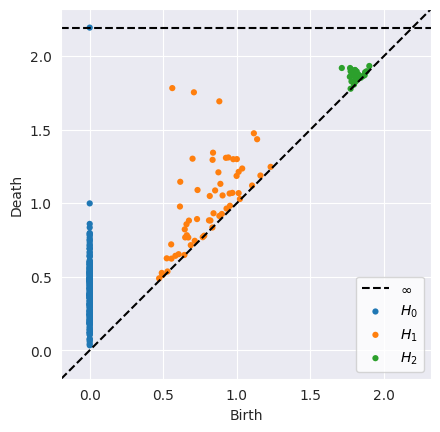

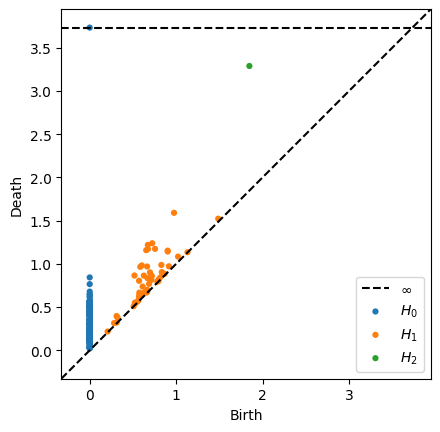

In [4]:
data_torus = ripser(samples, maxdim=2)
data_circle = ripser(samples_circle, maxdim=2)
plot_diagrams(data_torus['dgms'], show=True)
plot_diagrams(data_circle['dgms'], show=True)

In [5]:
trainings_data_circle = []
data_torus = []

processed_data_torus = []
processed_data_circle = []
for i in range(1000):
    trainings_data_circle.append(ripser(sphere(n=200, r=2), maxdim=2))
    #trainings_data_circle.append(ripser(sample_circle(200), maxdim=2))

for i in range(500):
    data_torus.append(ripser(torus(n=200, a=2, c=1), maxdim=2))
    #data_torus.append(ripser(sample_torus(200), maxdim=2))

scaled_data_circle = []
scaled_data_torus = []
#for l,k in zip(trainings_data_circle, data_torus):
#    print(l, k)


for d in trainings_data_circle:
    if (t_d := transform_data(d)) is not None:
        processed_data_circle.append(t_d)
for d in data_torus:
    if (t_d := transform_data(d)) is not None:
        processed_data_torus.append(t_d)

#scaler = preprocessing.MinMaxScaler().fit(processed_data_circle)
#
#scaled_data_circle = scaler.fit_transform(processed_data_circle)
#scaled_data_torus = scaler.fit_transform(processed_data_torus)

tensors_circle = []
tensors_torus = []

for d in processed_data_circle:
    tensors_circle.append(torch.tensor(d, dtype=torch.float32, device=device))

for d in processed_data_torus:
    tensors_torus.append(torch.tensor(d, dtype=torch.float32, device=device))


AssertionError: That's not a torus

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self, bias):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(10, 10, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(10, 5, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(5, 5, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(5, 2, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(2, 5, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(5, 5, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(5, 10, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(10, 10, bias=bias),
        ).to(device)

    def forward(self, x):
        return self.layers(x)


def wasserstein_loss(input, target):
    reshaped_input = input.reshape((input.shape[0], input.shape[1] // 2, 2))
    reshaped_target = target.reshape((target.shape[0], target.shape[1] // 2, 2))

    loss = torch.tensor(0, dtype=torch.float32, device=device)

    for x, y in zip(reshaped_input, reshaped_target):
        loss = loss.add(sliced_wasserstein(x, y, M=40))

    return loss


class AETrainer:
    def __init__(self, model):
        self.model = model

    def train(self, training_data, epochs):
        train_loader = torch.utils.data.DataLoader(list(zip(training_data, training_data)), batch_size=15, shuffle=True)
        loss_function = nn.L1Loss(reduction='mean').to(device)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4 / 2)
        losses = []
        for epoch in range(0, epochs):
            epoch_loss = []
            for i, data in enumerate(train_loader, 0):
                inputs, targets = data
                optimizer.zero_grad()
                outputs = self.model(inputs)
                #loss = wasserstein_loss(inputs, outputs)
                loss = loss_function(outputs, targets)  # * loss_function(outputs, targets)
                loss.backward()
                optimizer.step()
                epoch_loss.append(loss.item())
            print(f"epoch-{epoch}, done")
            losses.append(sum(epoch_loss) / len(epoch_loss))
            plot_data_ae(training_data, self.model.forward(torch.stack(training_data)))
        return losses

    def model(self):
        return self.model()

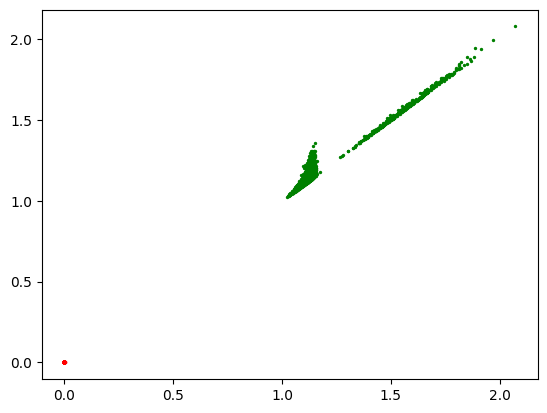

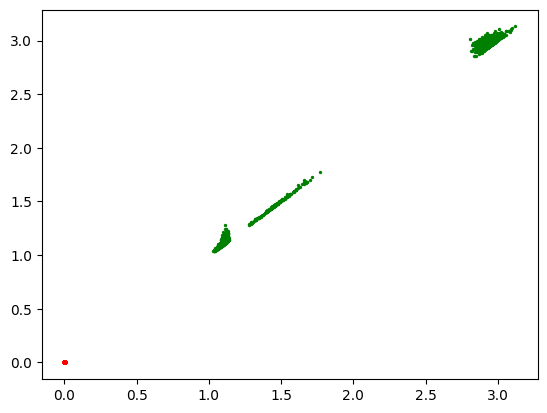

epoch-0, done


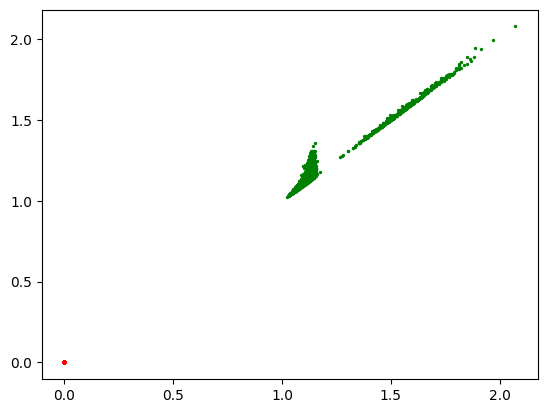

epoch-1, done


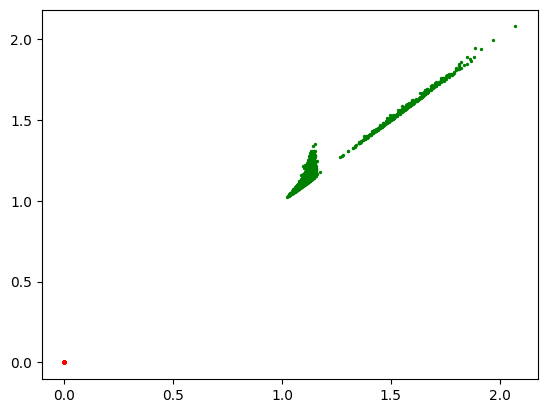

epoch-2, done


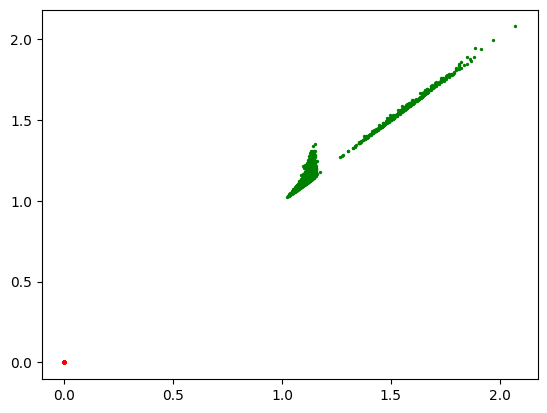

epoch-3, done


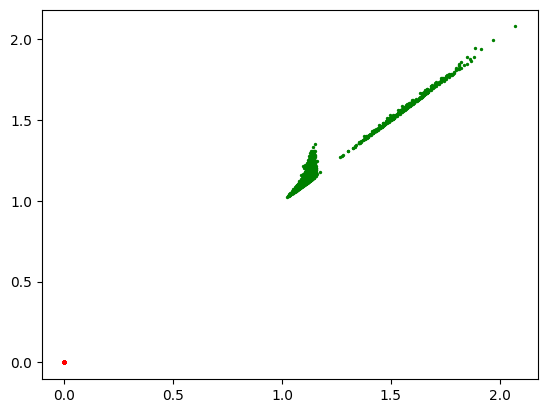

epoch-4, done


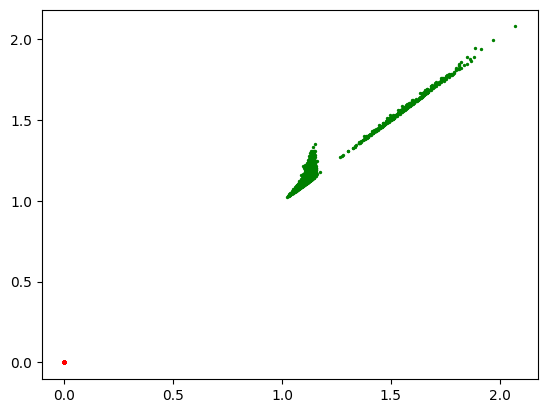

epoch-5, done


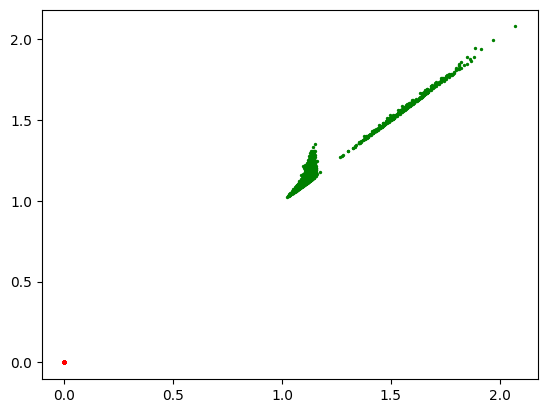

epoch-6, done


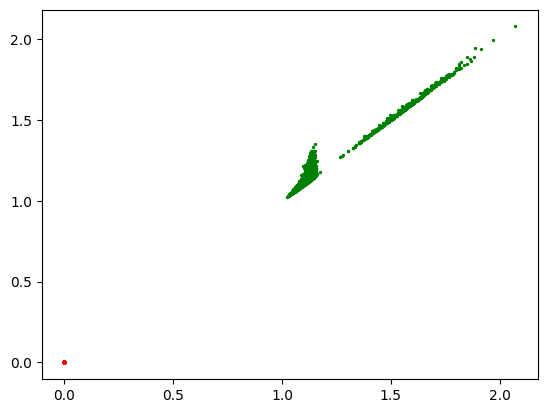

epoch-7, done


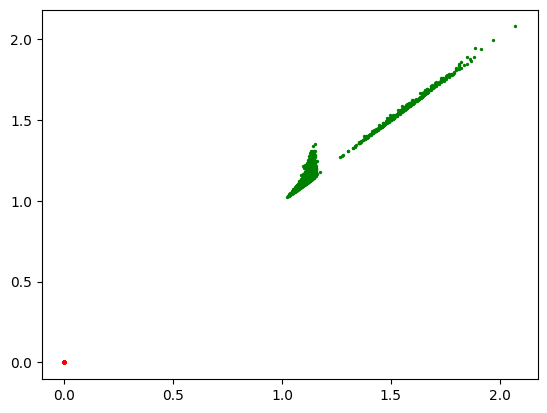

epoch-8, done


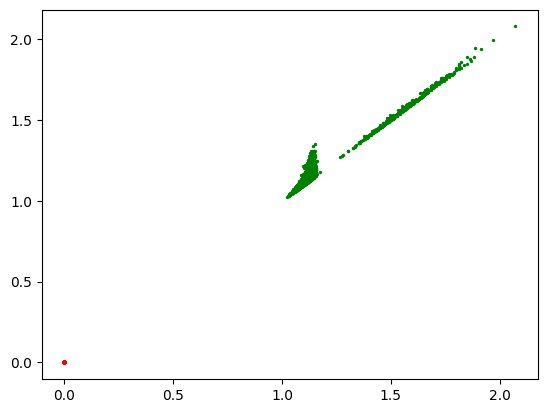

epoch-9, done


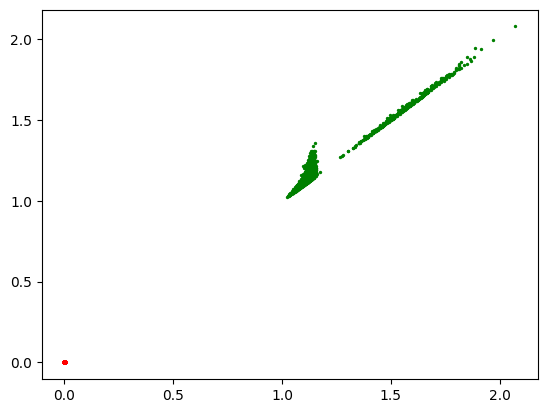

epoch-10, done


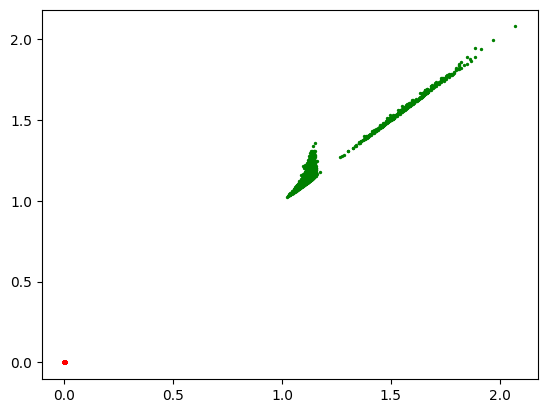

epoch-11, done


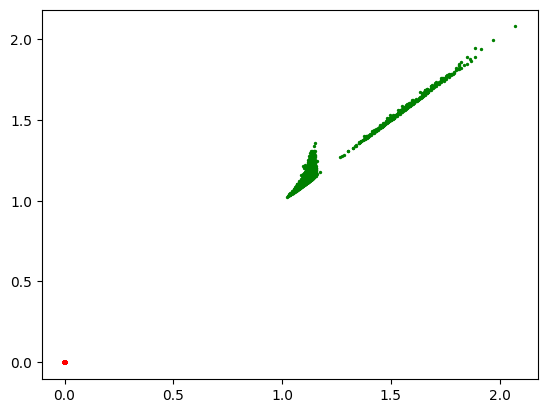

epoch-12, done


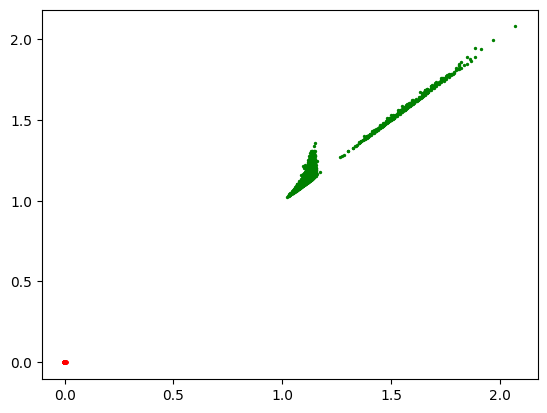

epoch-13, done


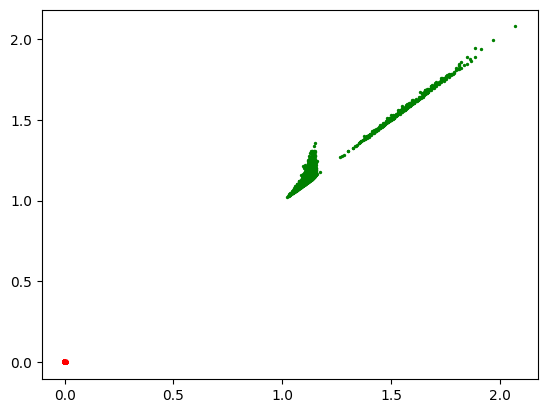

epoch-14, done


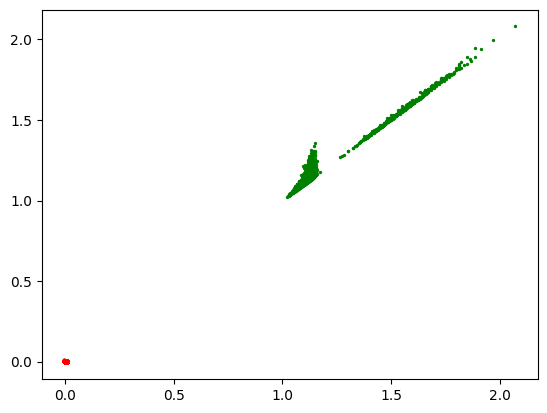

epoch-15, done


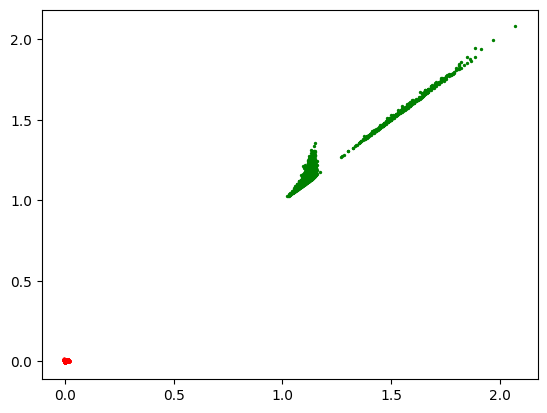

epoch-16, done


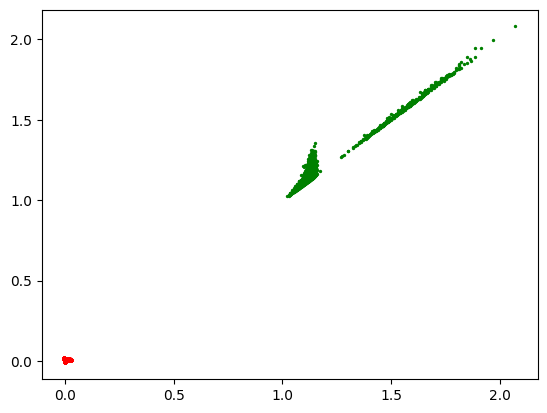

epoch-17, done


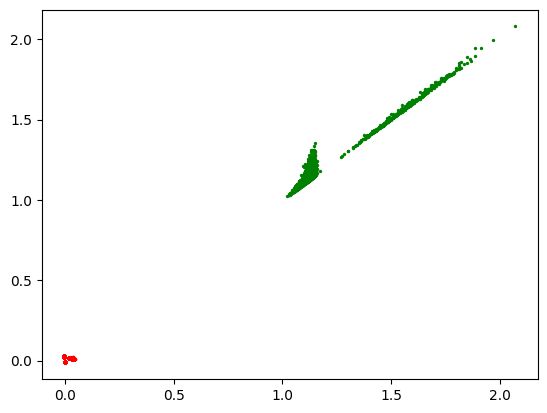

epoch-18, done


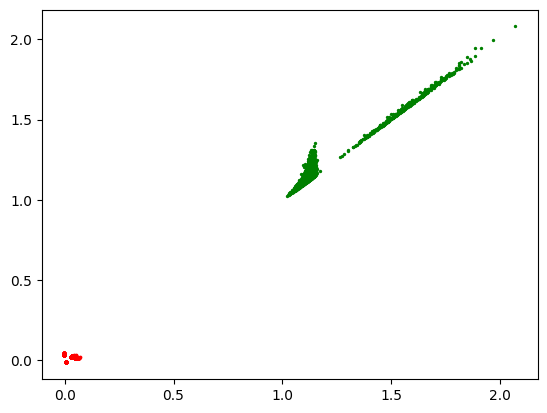

epoch-19, done


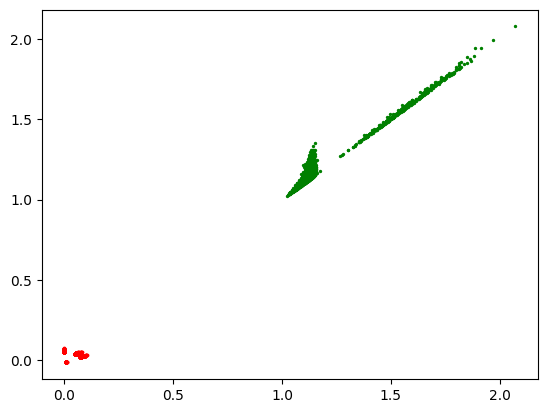

epoch-20, done


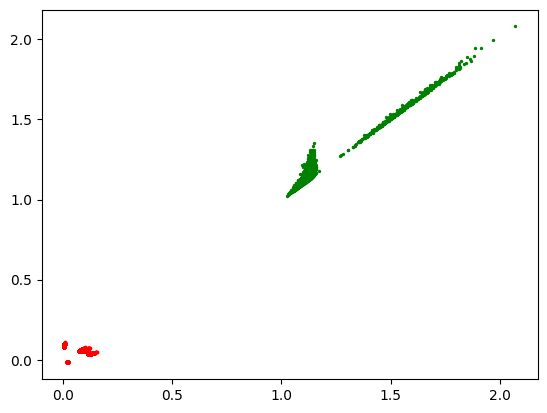

epoch-21, done


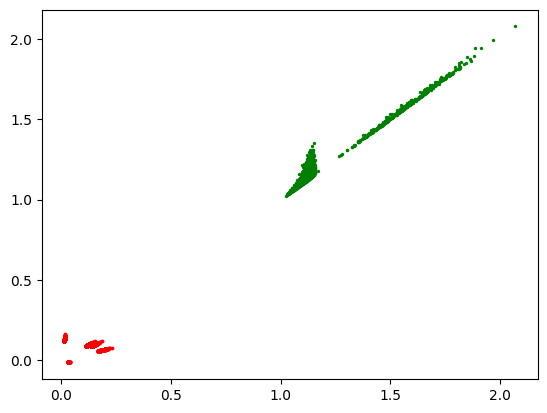

epoch-22, done


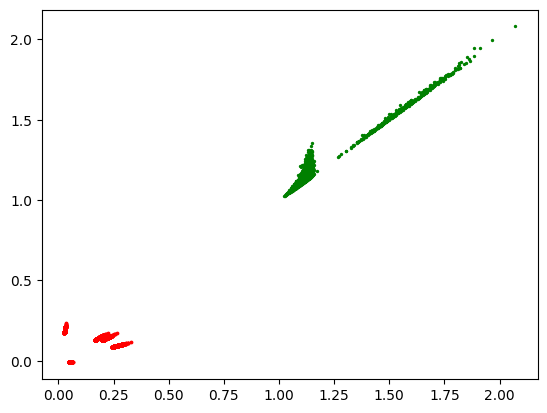

epoch-23, done


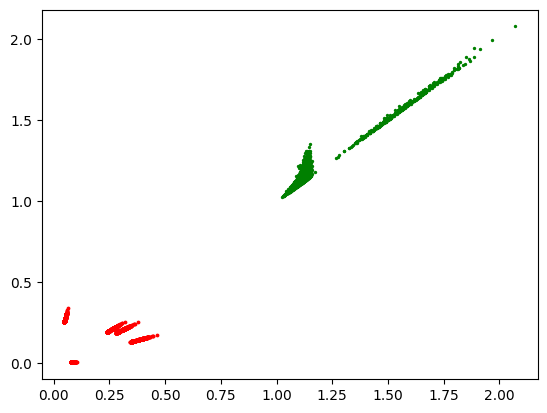

epoch-24, done


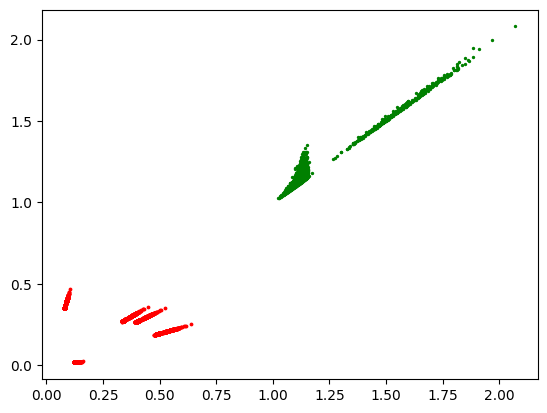

epoch-25, done


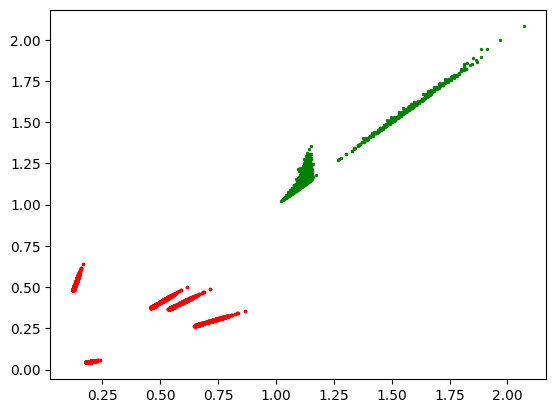

epoch-26, done


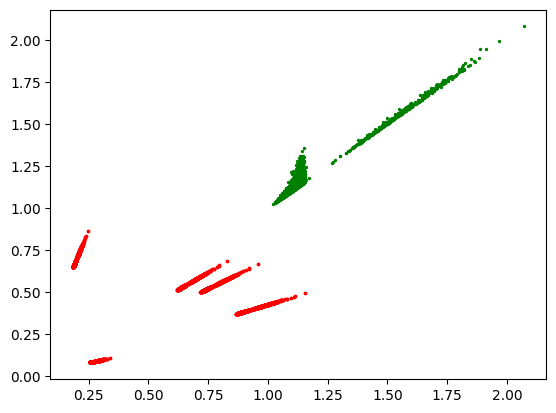

epoch-27, done


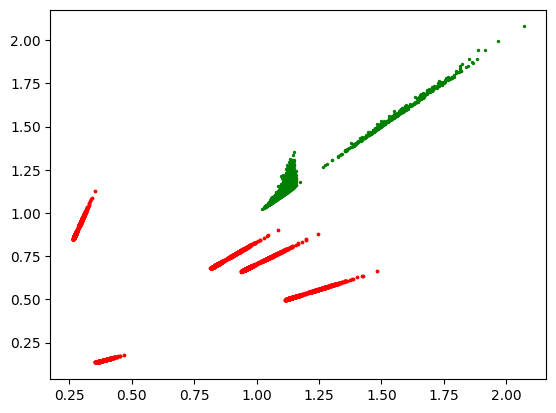

epoch-28, done


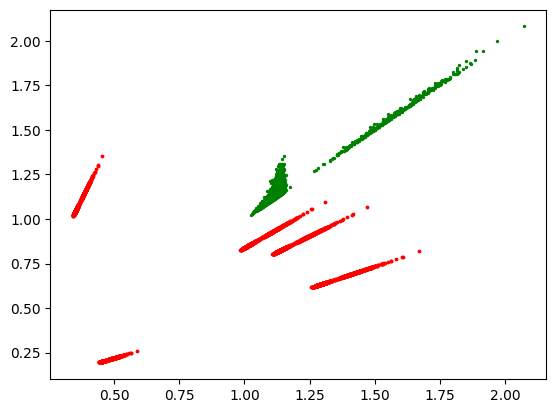

epoch-29, done


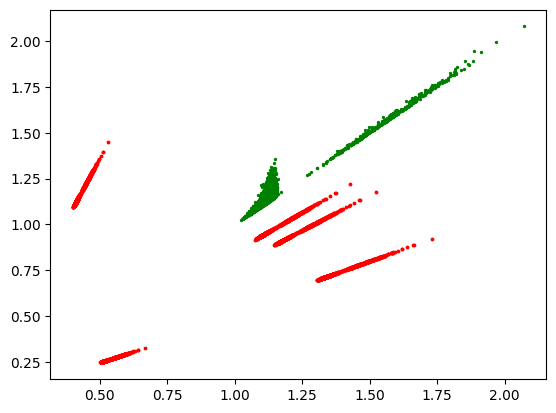

epoch-30, done


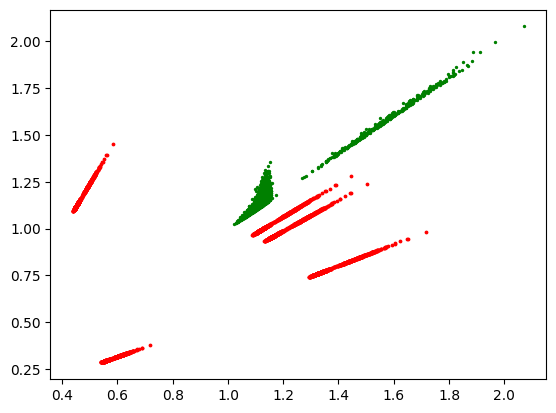

epoch-31, done


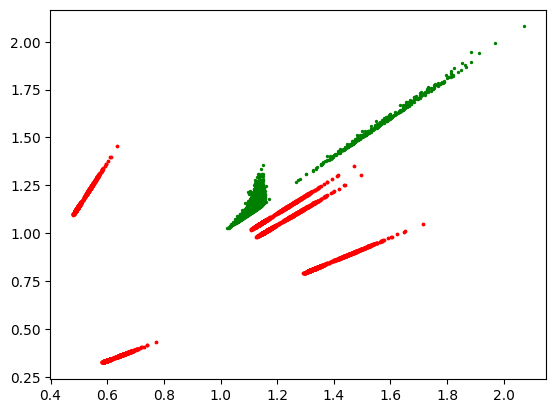

epoch-32, done


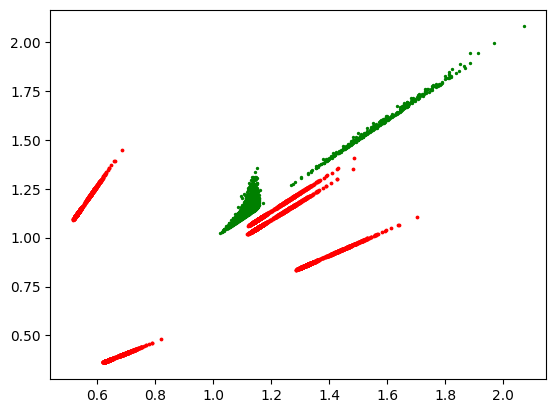

epoch-33, done


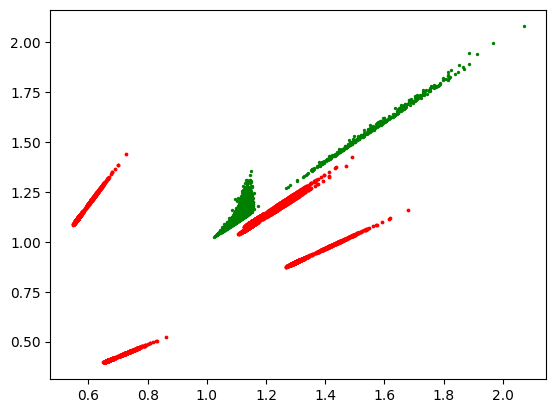

epoch-34, done


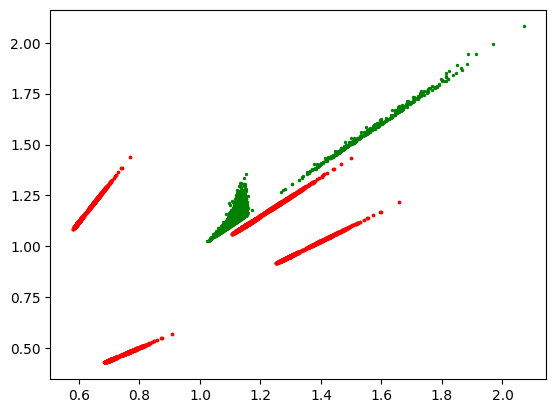

epoch-35, done


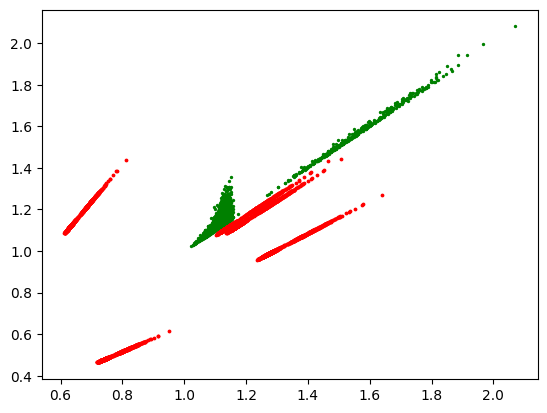

epoch-36, done


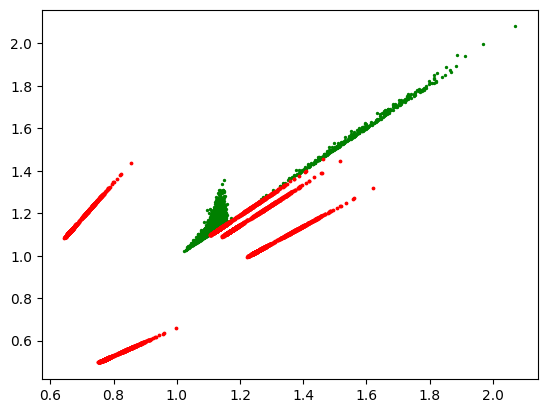

epoch-37, done


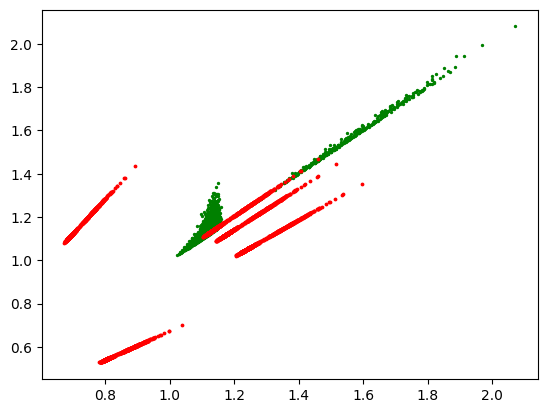

epoch-38, done


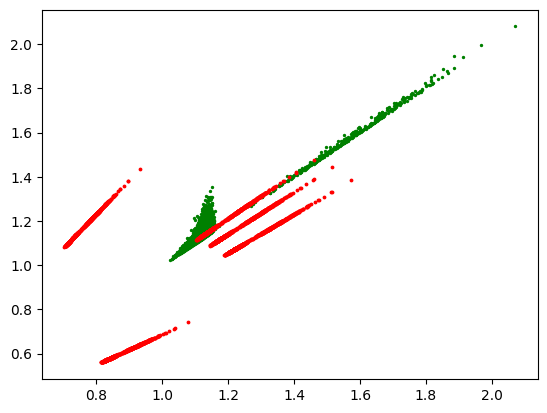

epoch-39, done


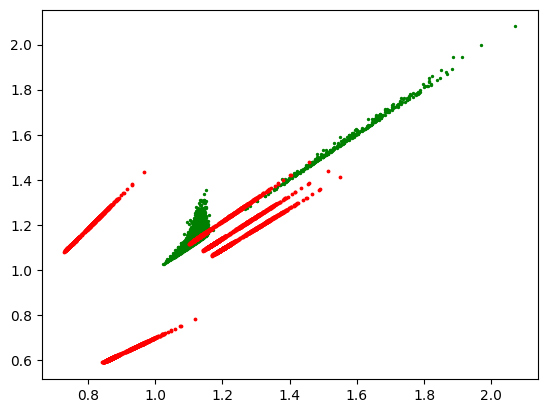

epoch-40, done


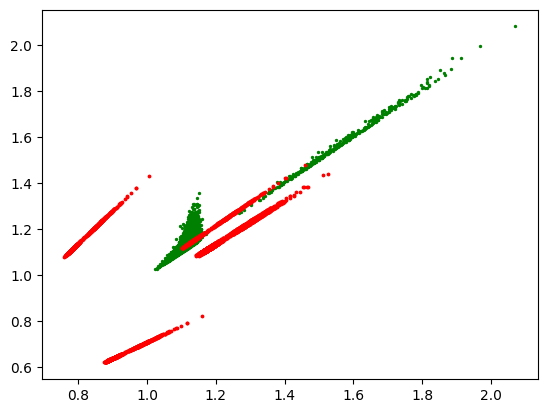

epoch-41, done


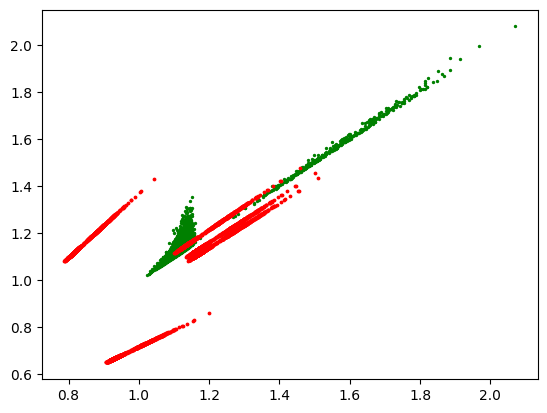

epoch-42, done


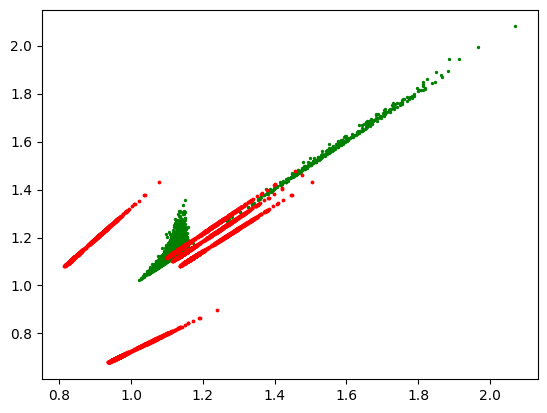

epoch-43, done


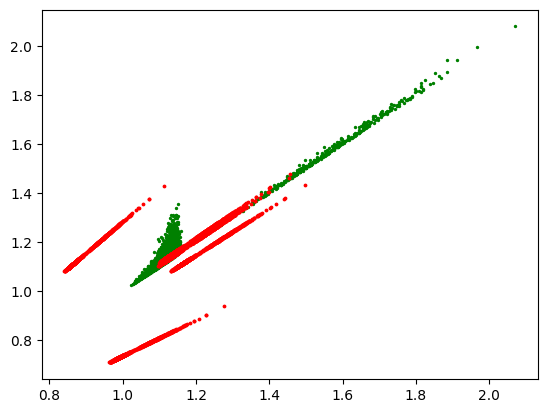

epoch-44, done


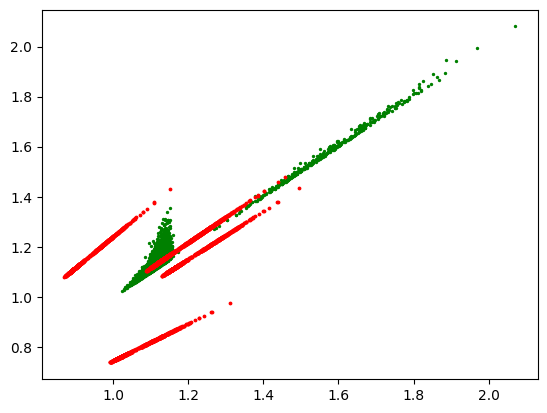

epoch-45, done


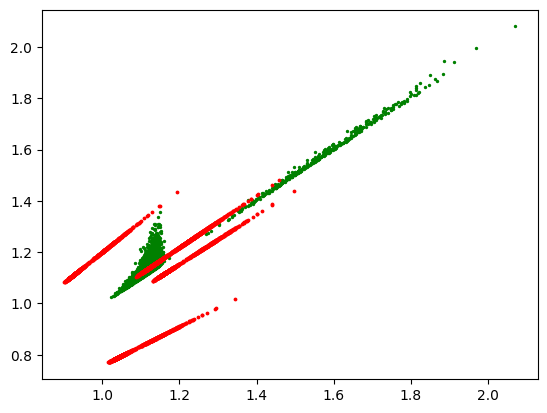

epoch-46, done


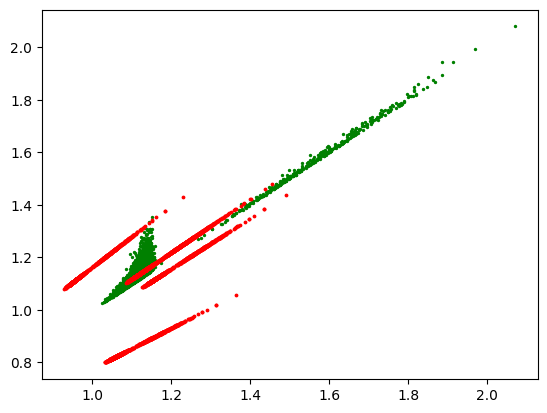

epoch-47, done


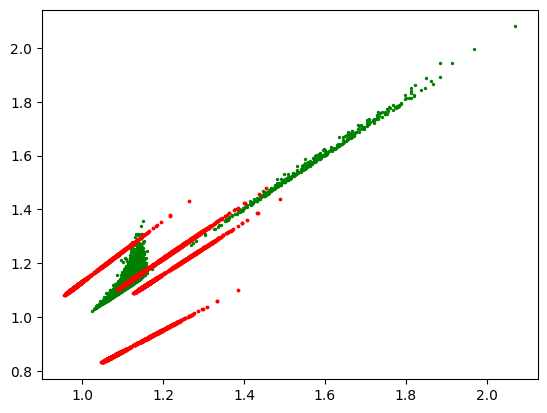

epoch-48, done


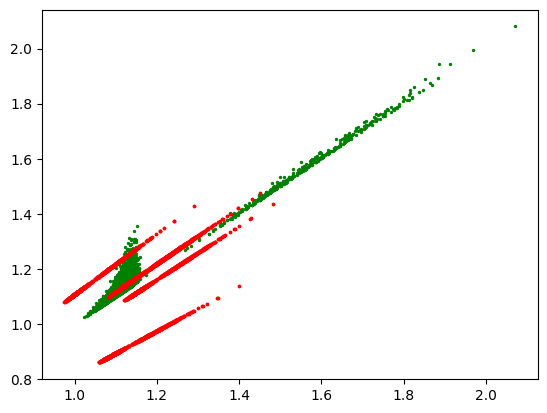

epoch-49, done


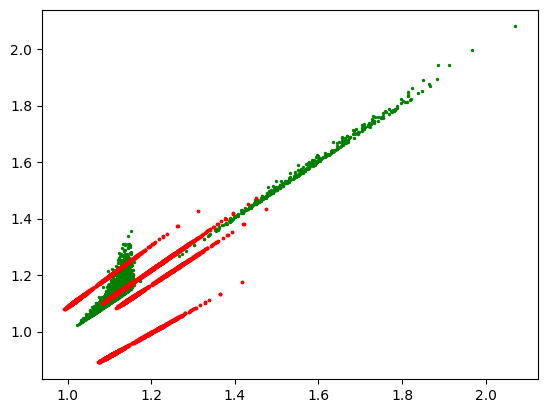

epoch-50, done


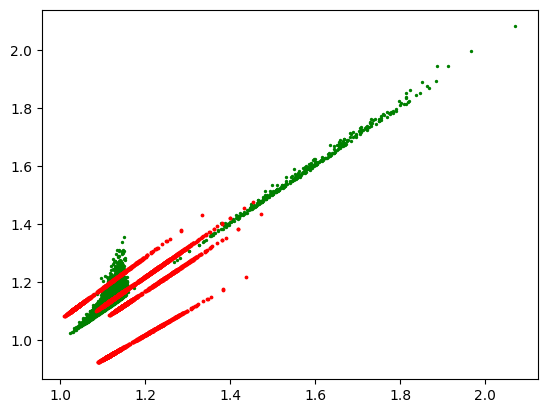

epoch-51, done


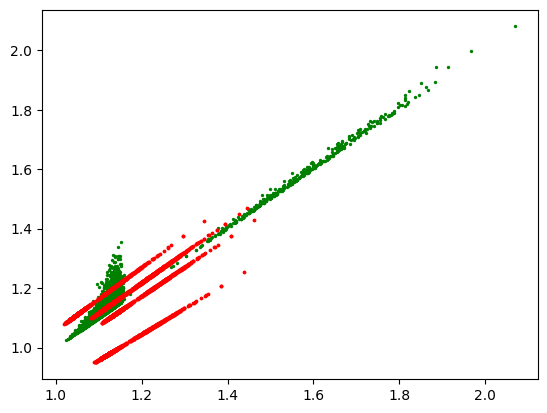

epoch-52, done


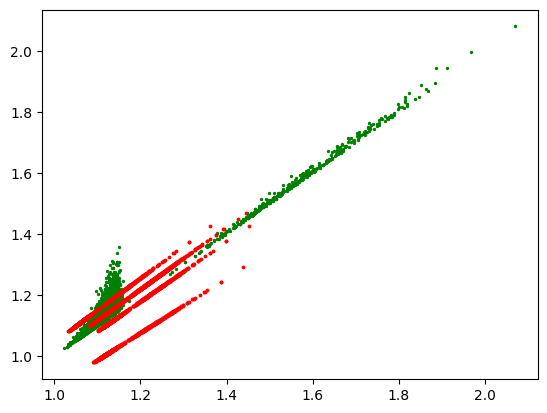

epoch-53, done


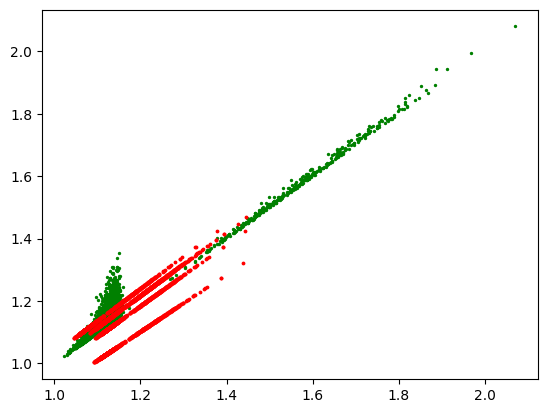

epoch-54, done


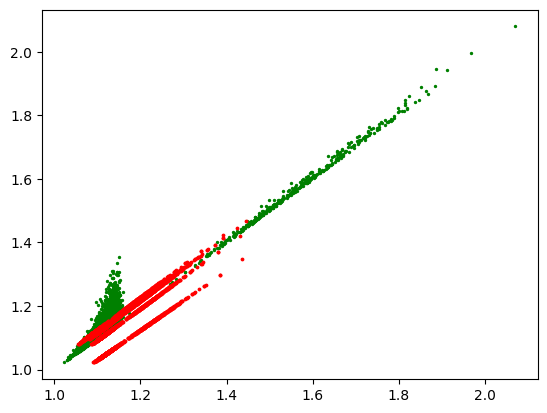

epoch-55, done


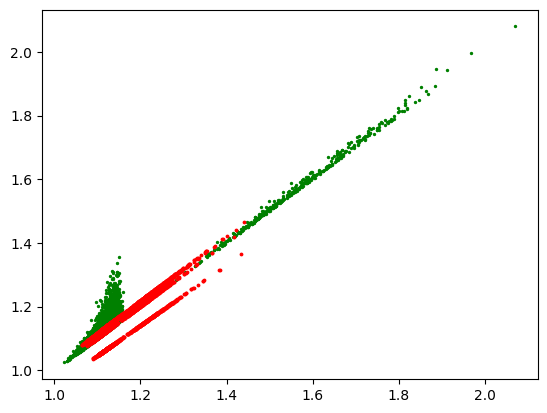

epoch-56, done


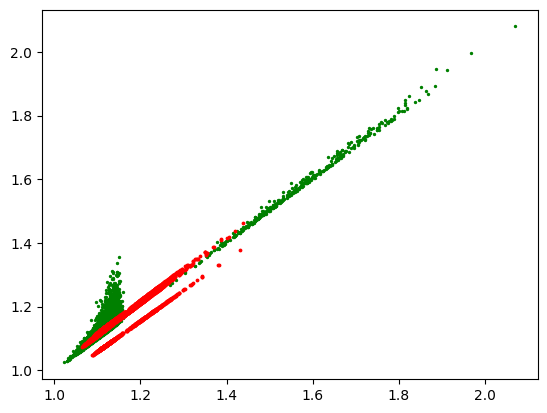

epoch-57, done


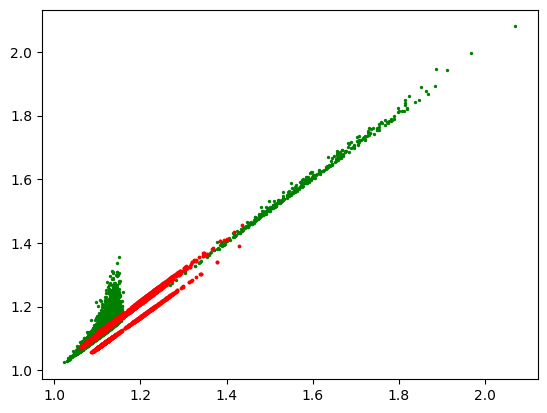

epoch-58, done


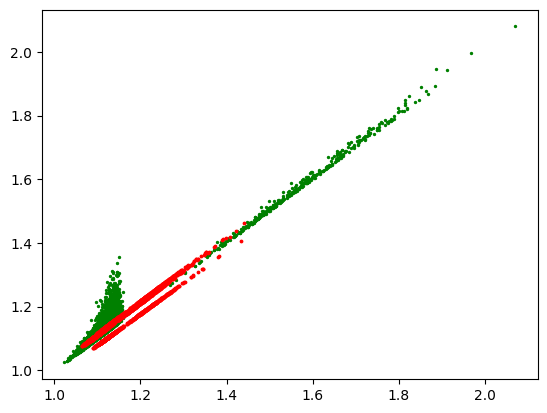

epoch-59, done


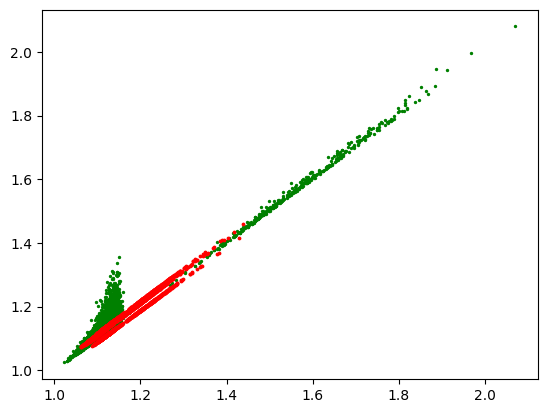

epoch-60, done


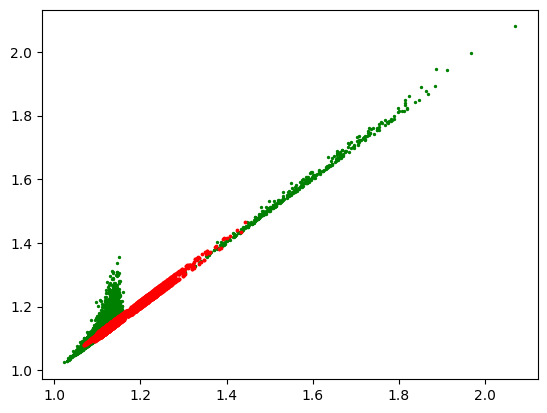

epoch-61, done


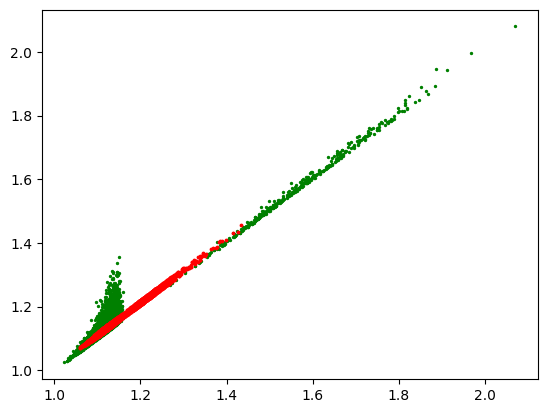

epoch-62, done


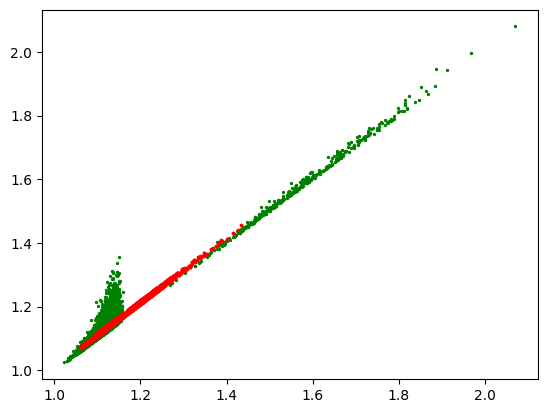

epoch-63, done


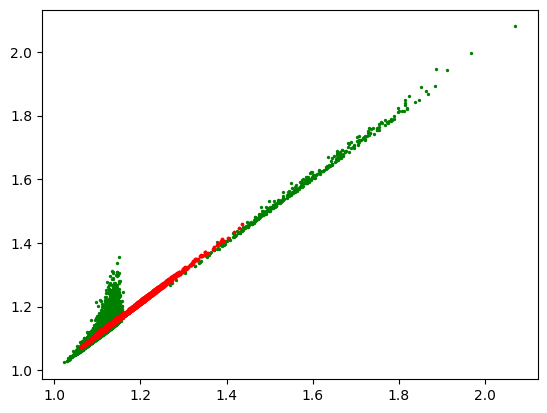

epoch-64, done


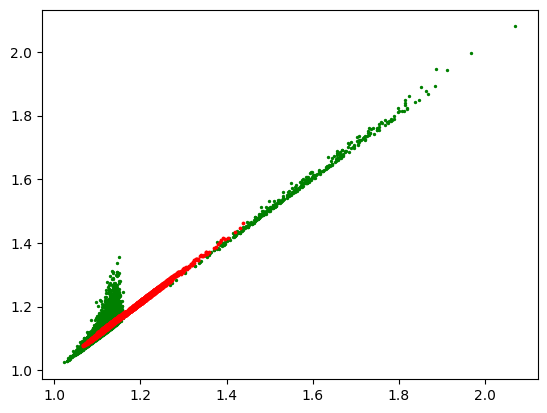

epoch-65, done


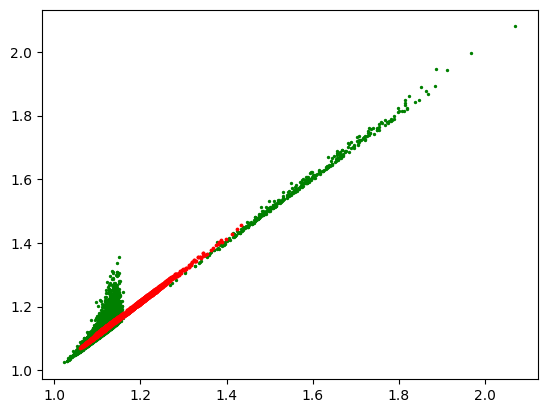

epoch-66, done


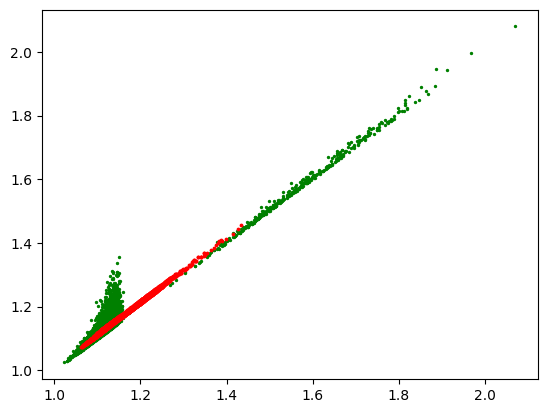

epoch-67, done


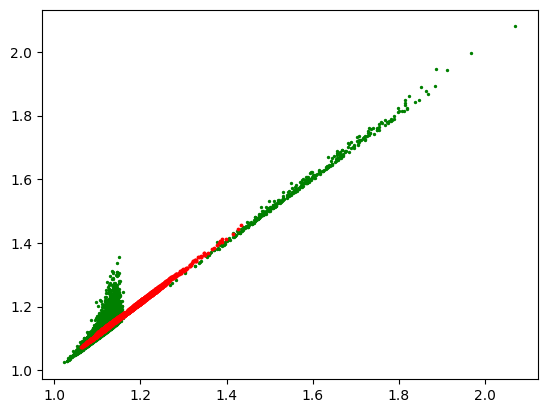

epoch-68, done


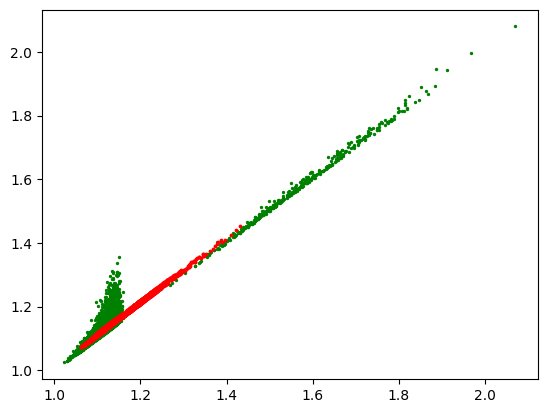

epoch-69, done


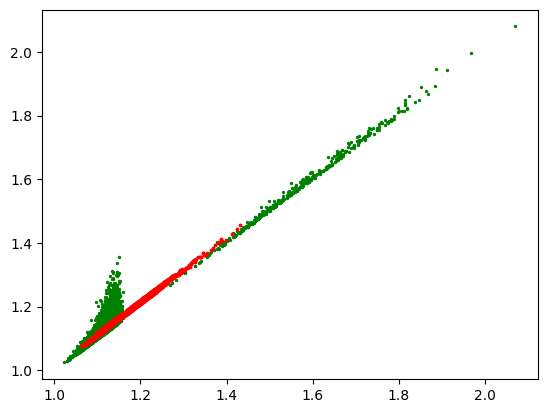

epoch-70, done


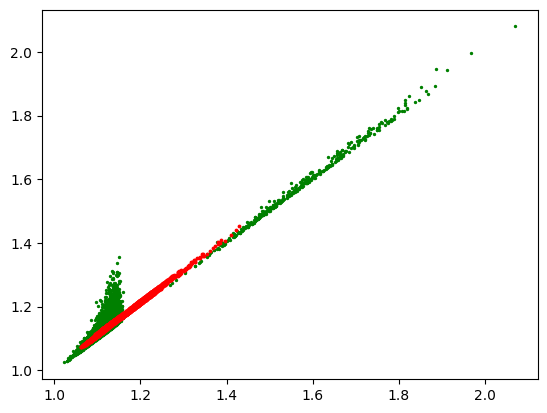

epoch-71, done


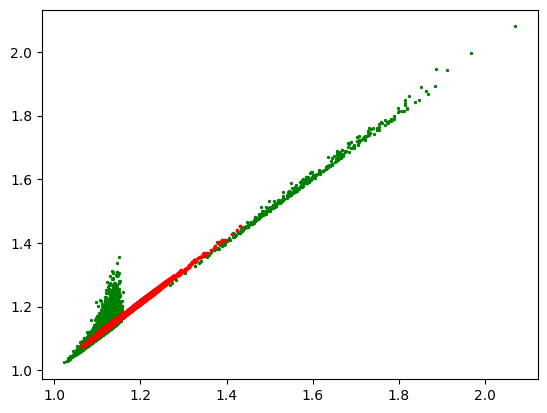

epoch-72, done


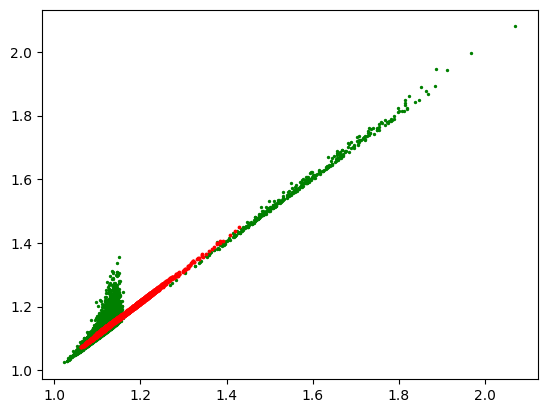

epoch-73, done


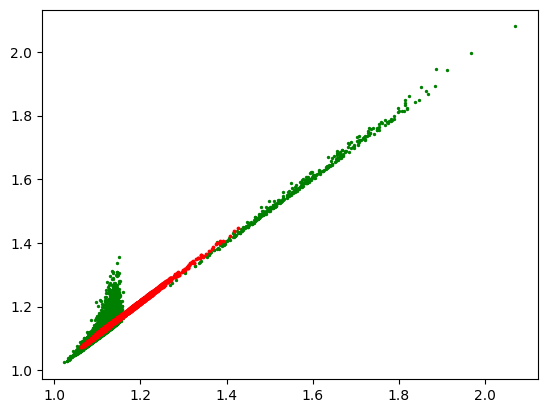

epoch-74, done


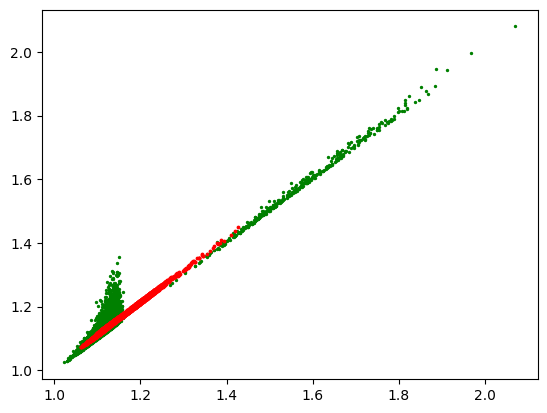

epoch-75, done


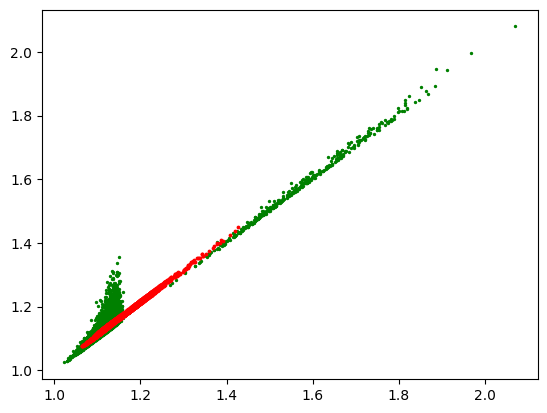

epoch-76, done


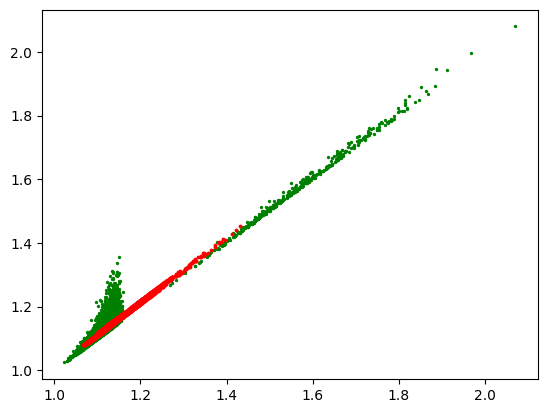

epoch-77, done


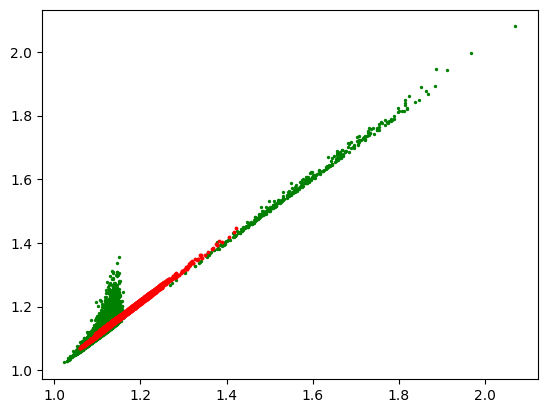

epoch-78, done


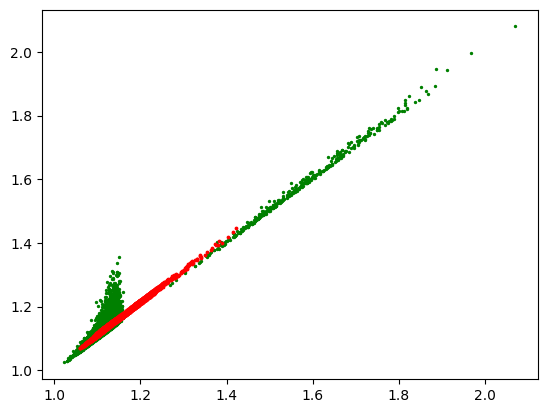

epoch-79, done


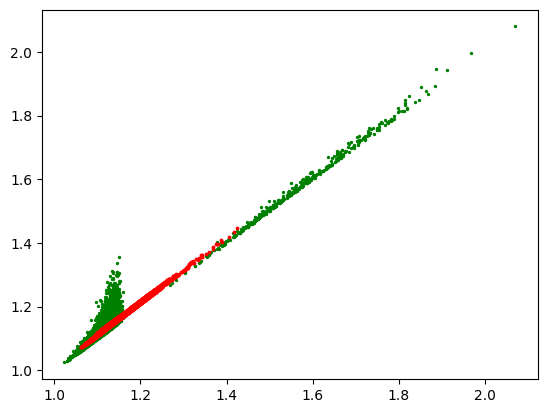

epoch-80, done


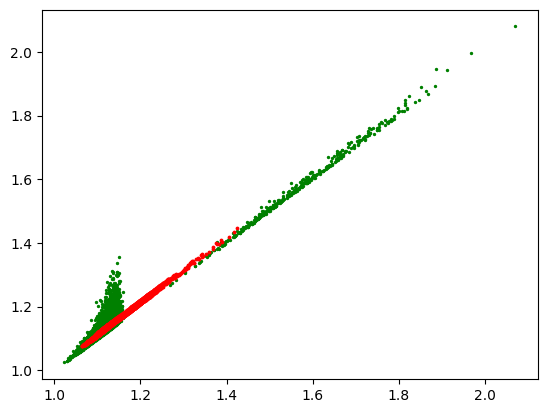

epoch-81, done


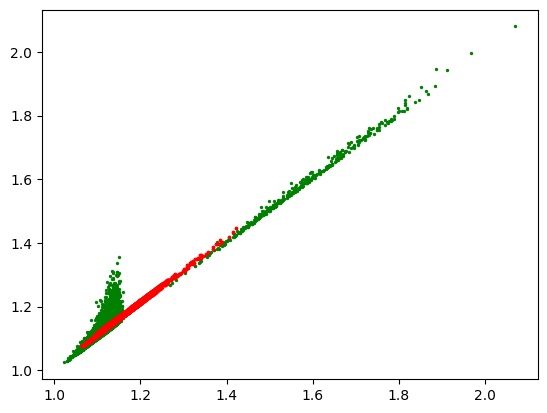

epoch-82, done


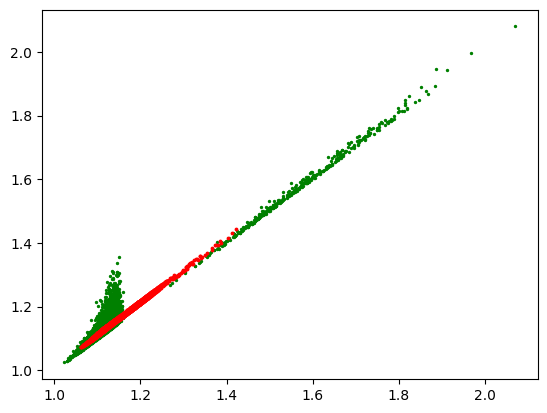

epoch-83, done


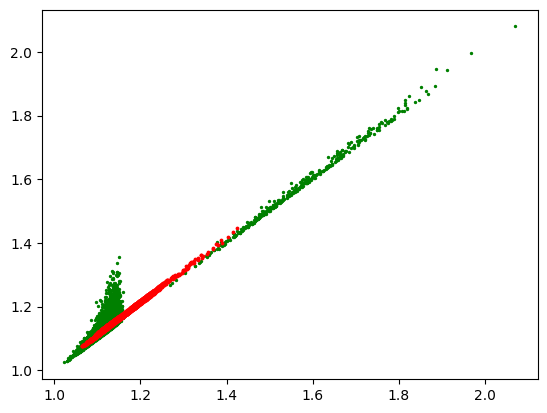

epoch-84, done


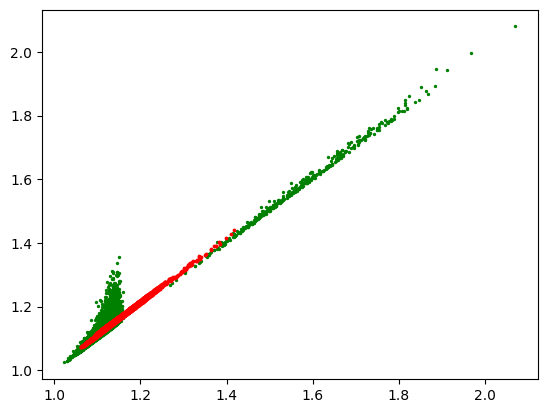

epoch-85, done


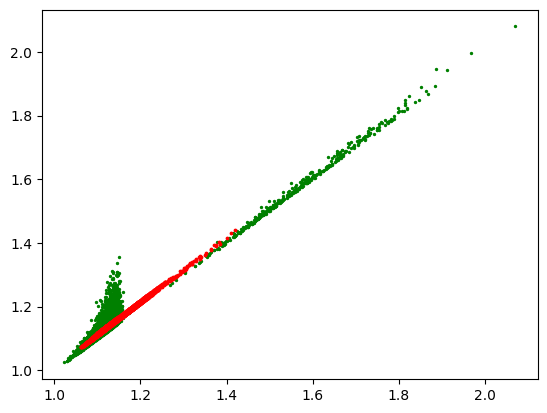

epoch-86, done


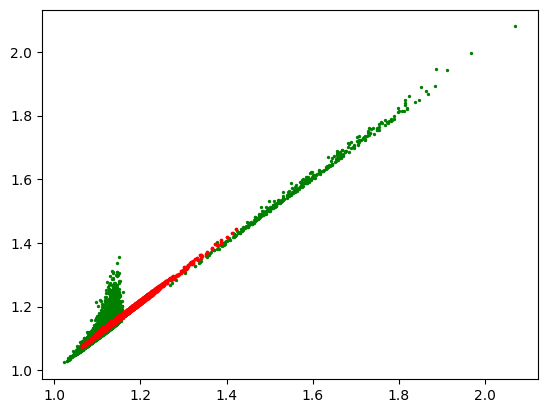

epoch-87, done


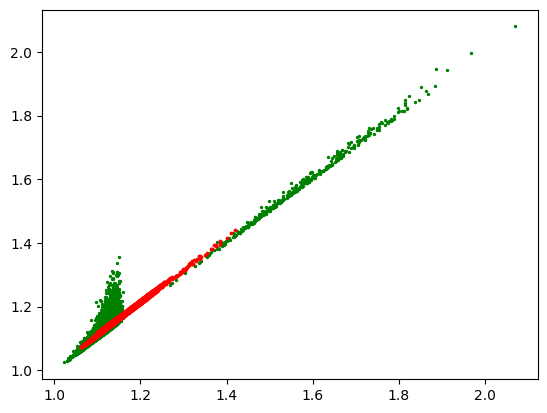

epoch-88, done


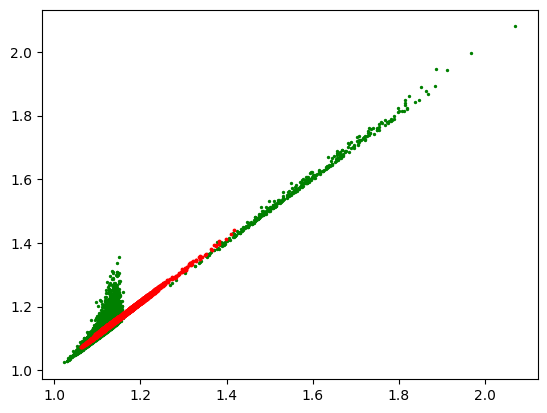

epoch-89, done


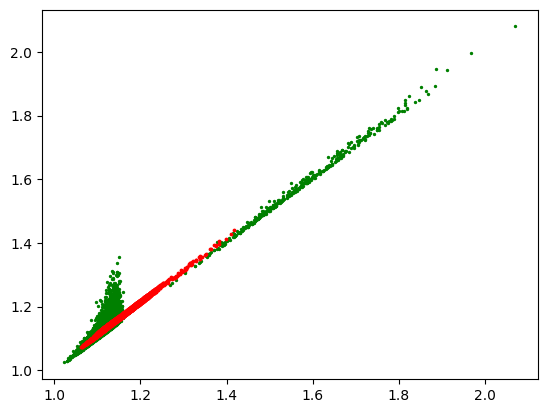

epoch-90, done


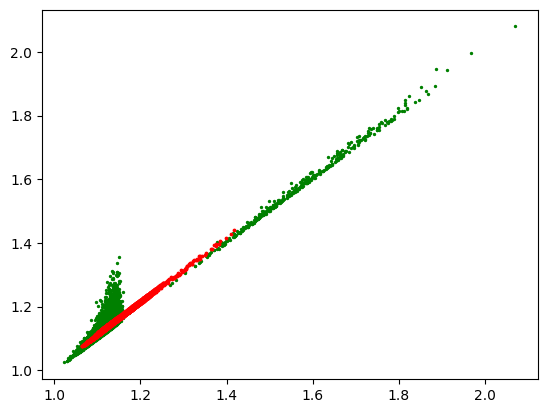

epoch-91, done


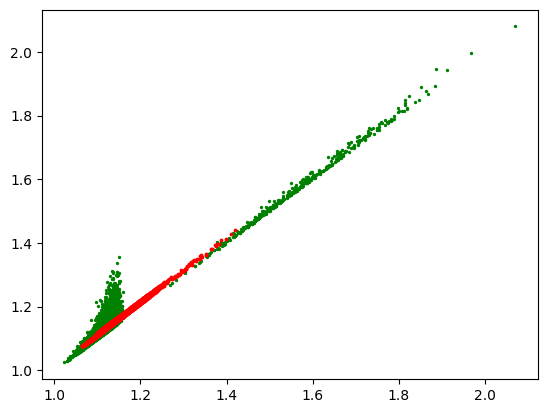

epoch-92, done


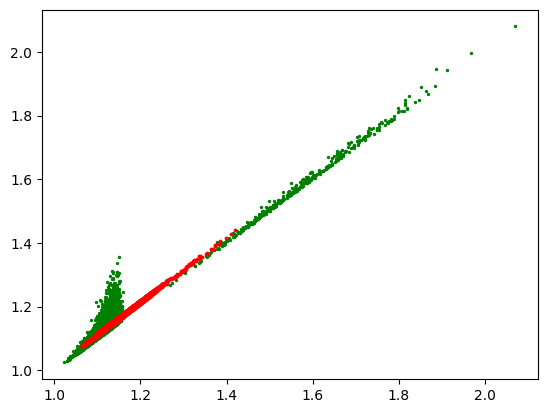

epoch-93, done


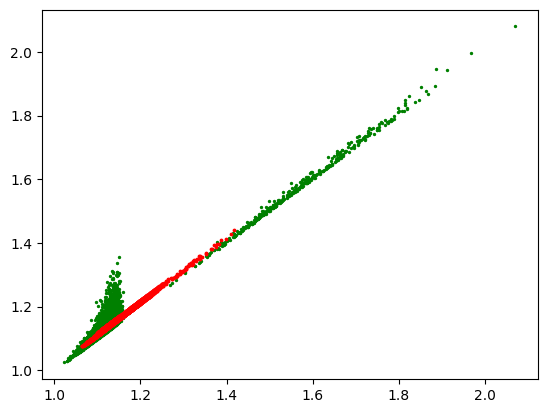

epoch-94, done


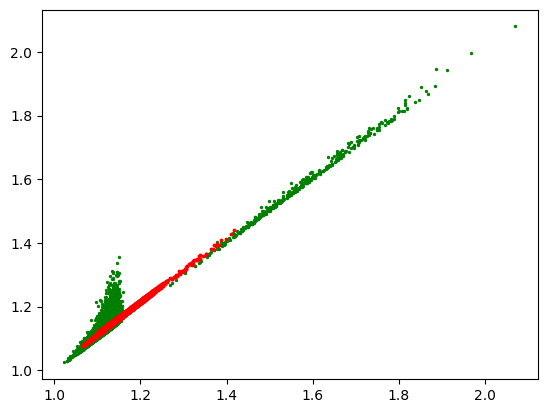

epoch-95, done


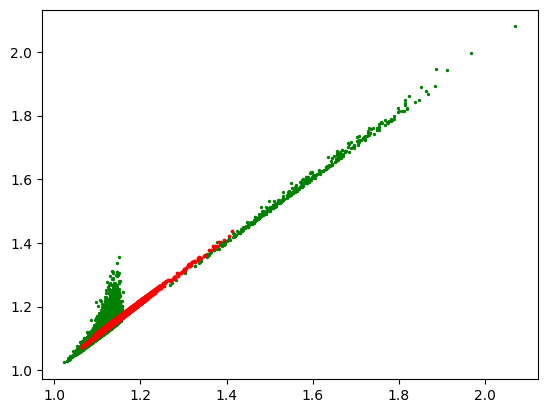

epoch-96, done


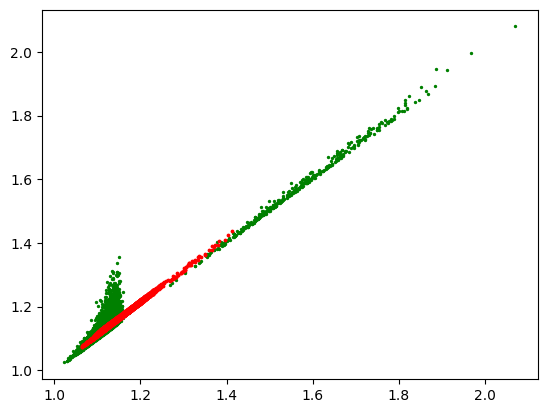

epoch-97, done


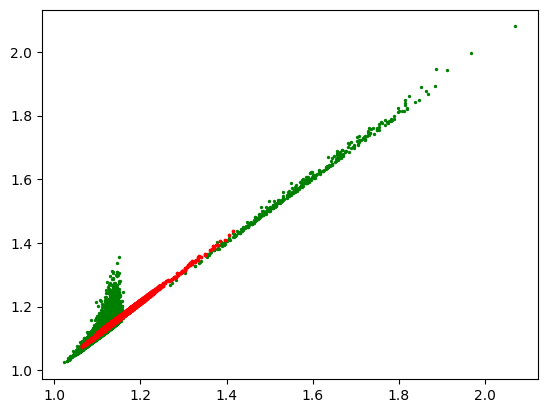

epoch-98, done


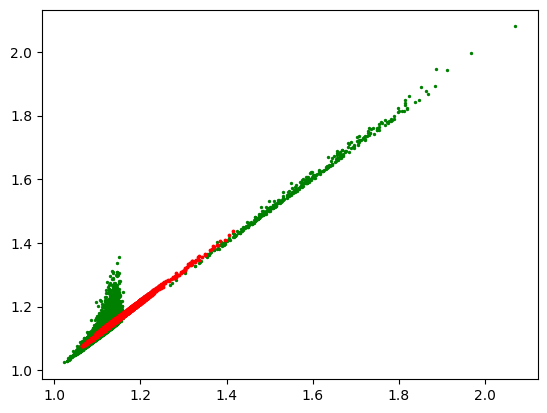

epoch-99, done


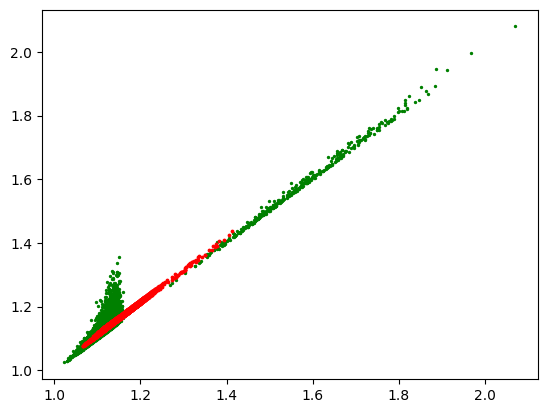

epoch-100, done


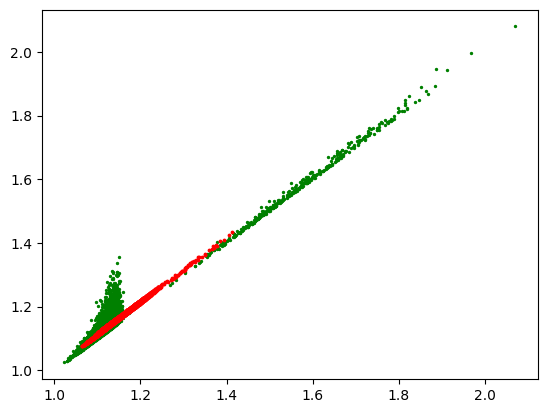

epoch-101, done


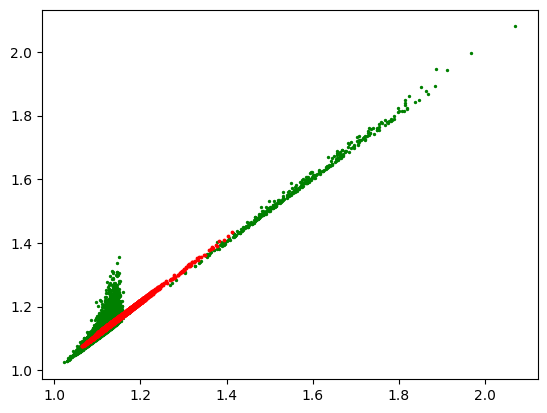

epoch-102, done


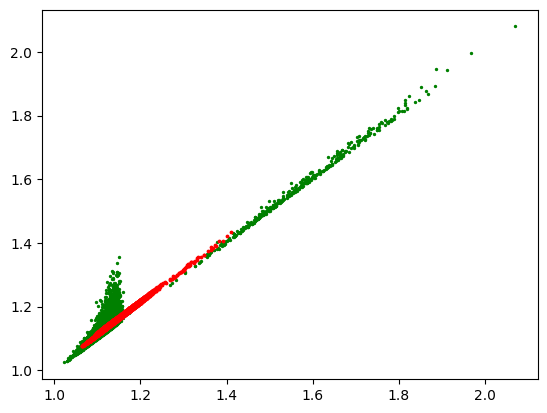

epoch-103, done


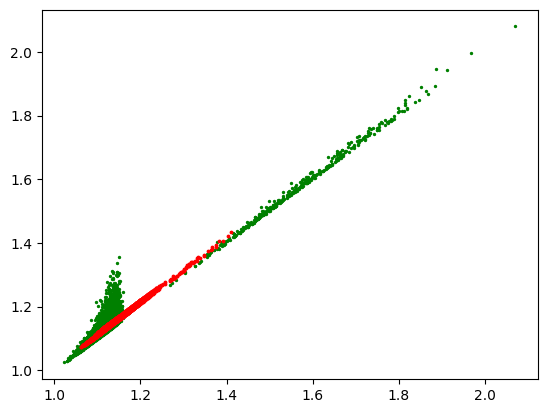

epoch-104, done


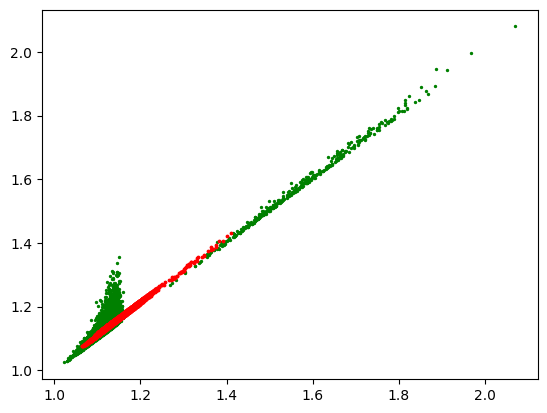

epoch-105, done


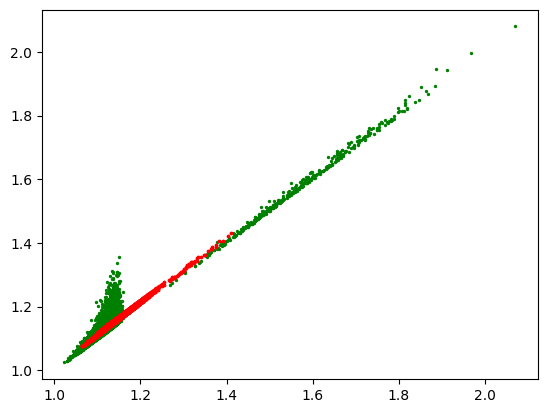

epoch-106, done


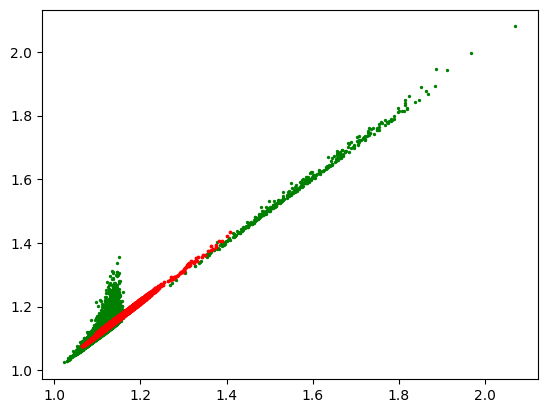

epoch-107, done


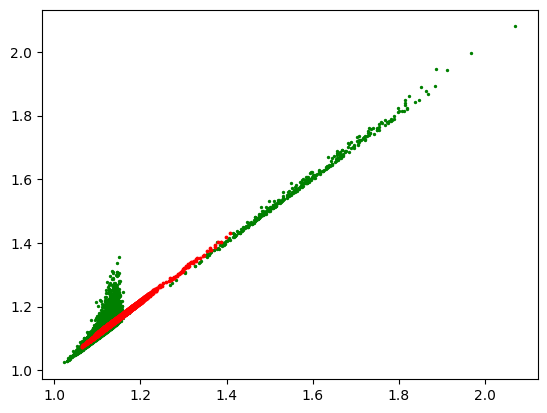

epoch-108, done


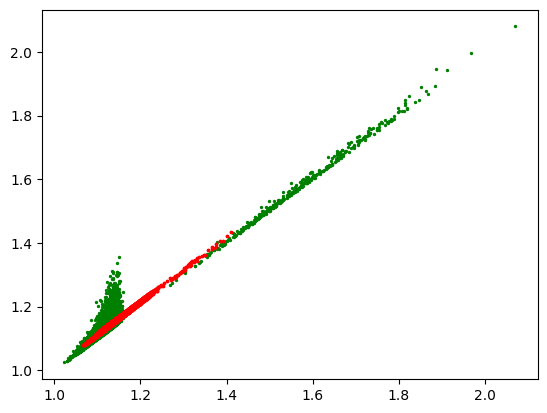

epoch-109, done


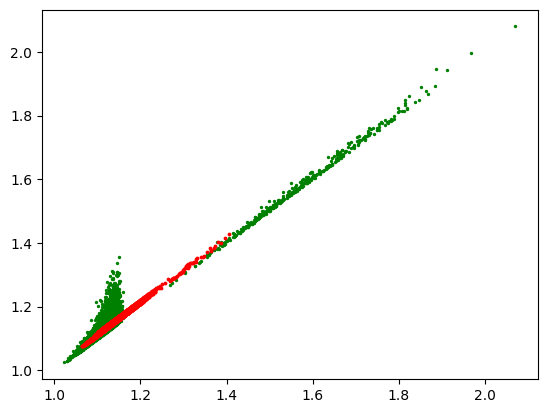

epoch-110, done


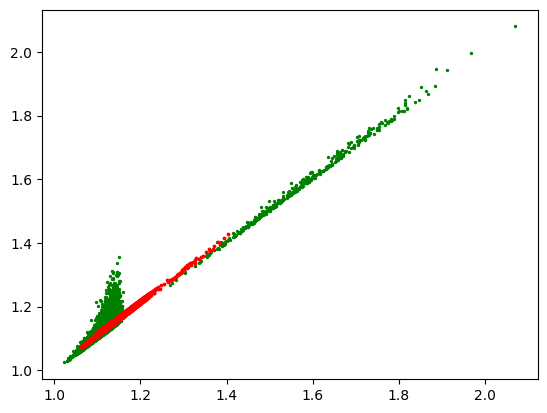

epoch-111, done


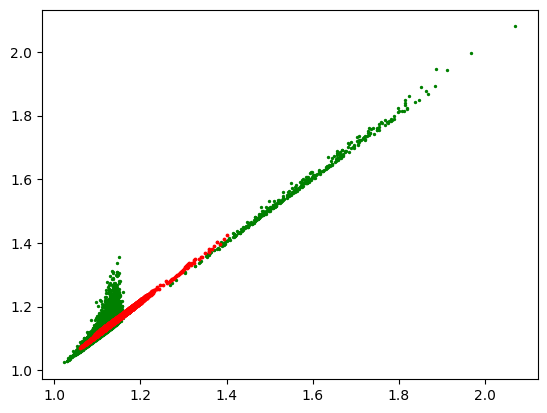

epoch-112, done


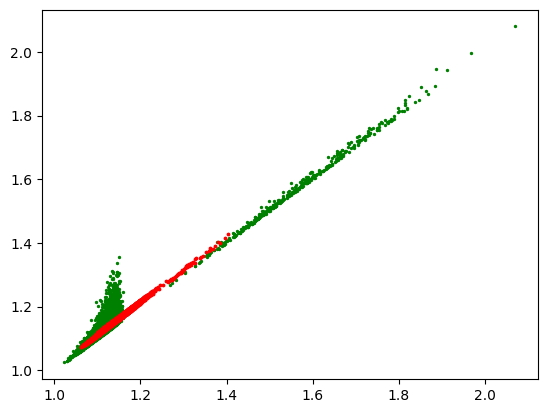

epoch-113, done


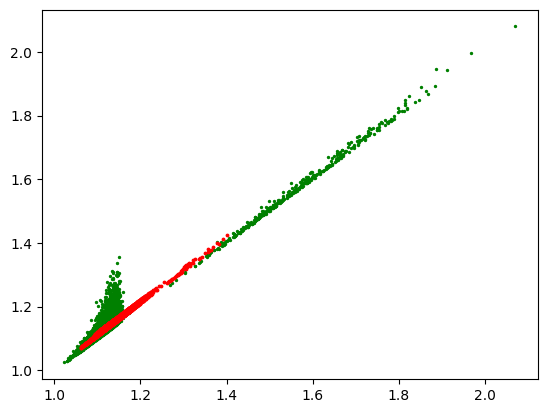

epoch-114, done


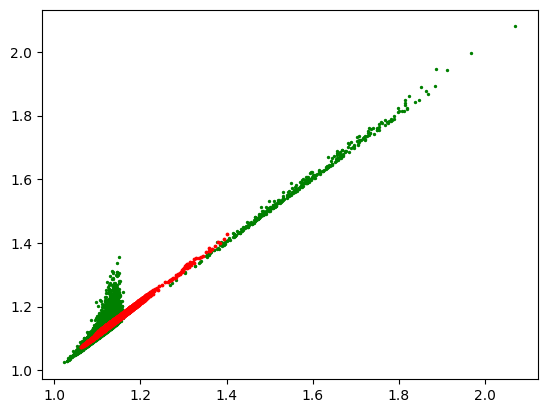

epoch-115, done


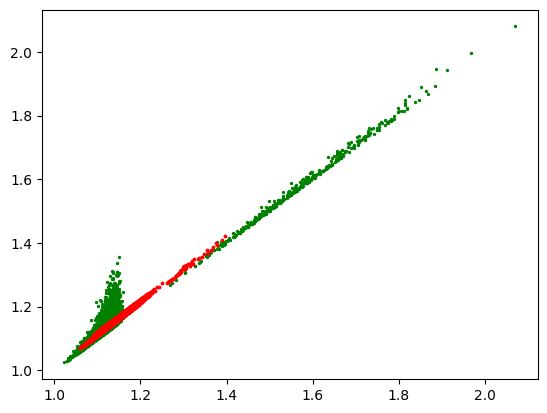

epoch-116, done


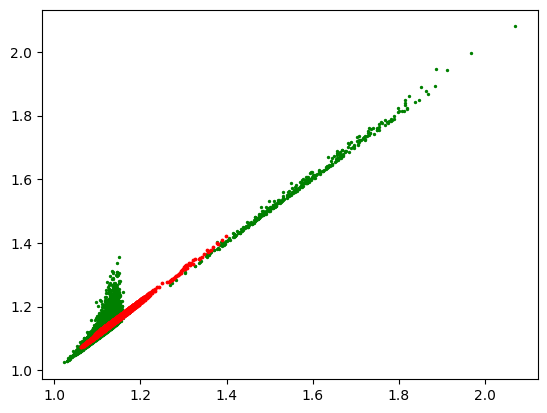

epoch-117, done


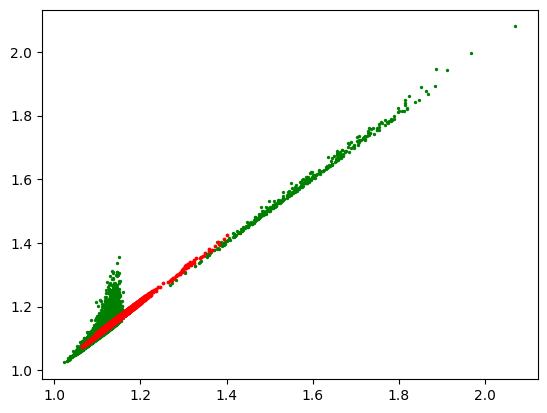

epoch-118, done


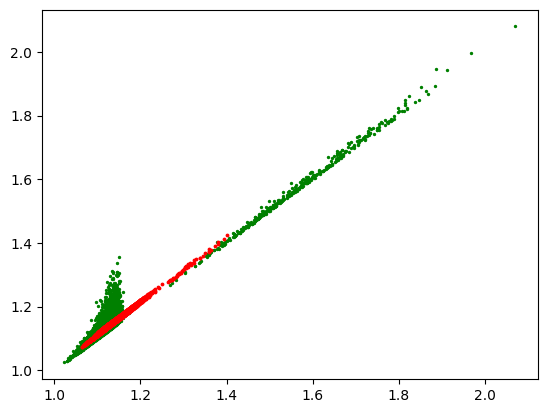

epoch-119, done


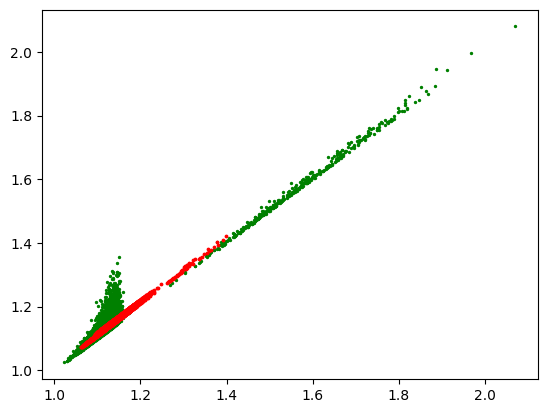

epoch-120, done


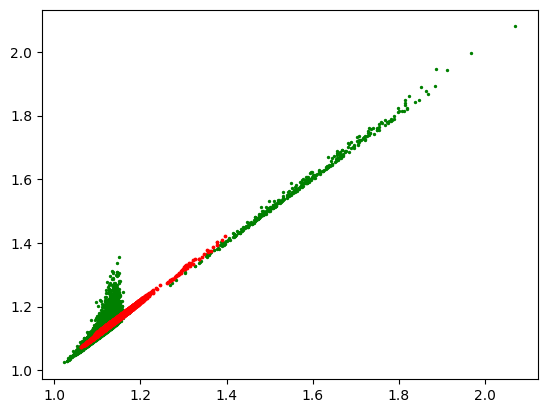

epoch-121, done


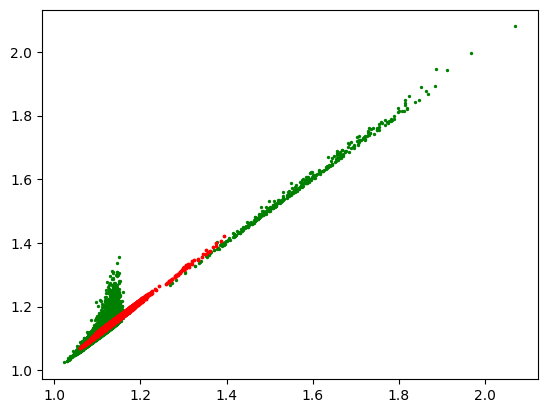

epoch-122, done


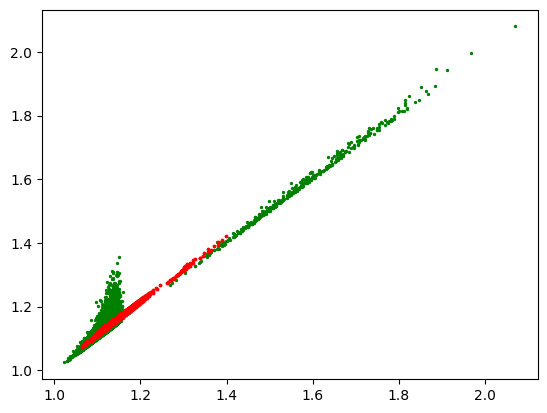

epoch-123, done


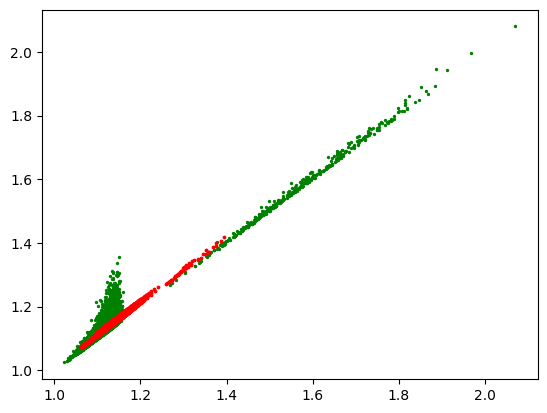

epoch-124, done


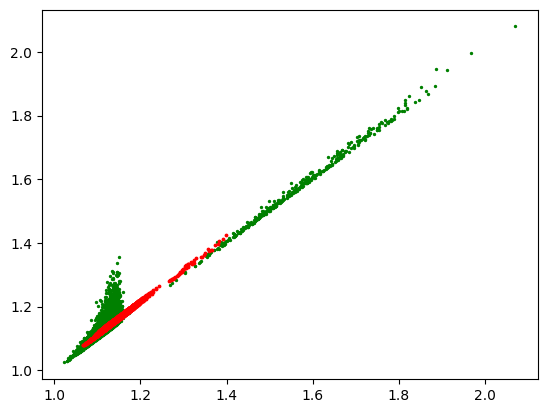

epoch-125, done


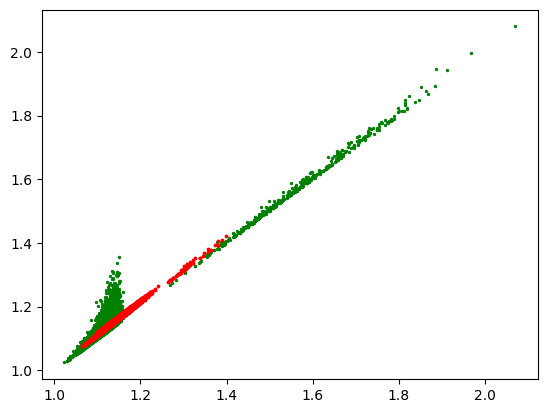

epoch-126, done


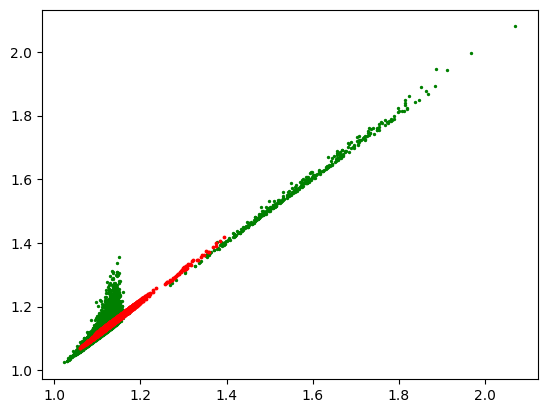

epoch-127, done


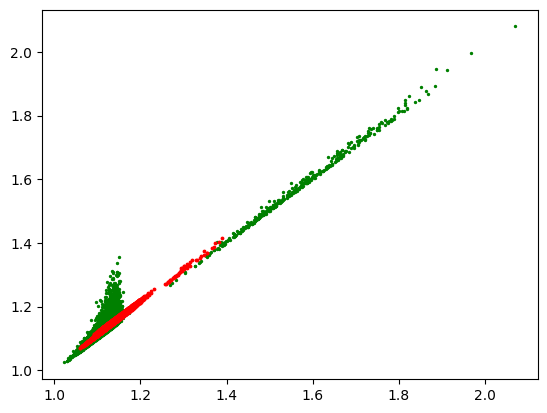

epoch-128, done


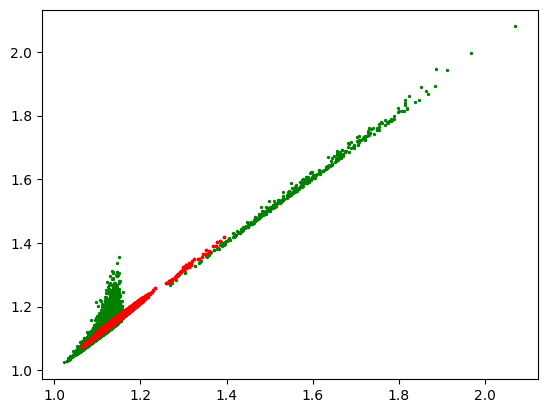

epoch-129, done


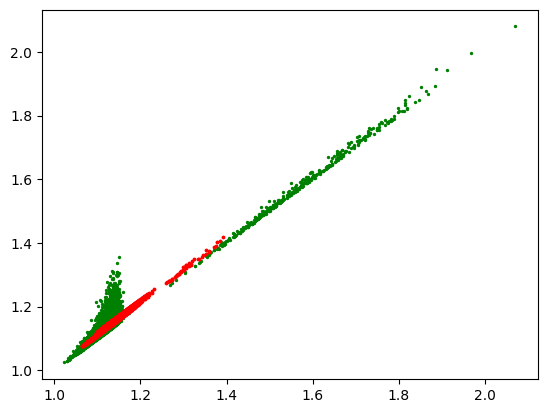

epoch-130, done


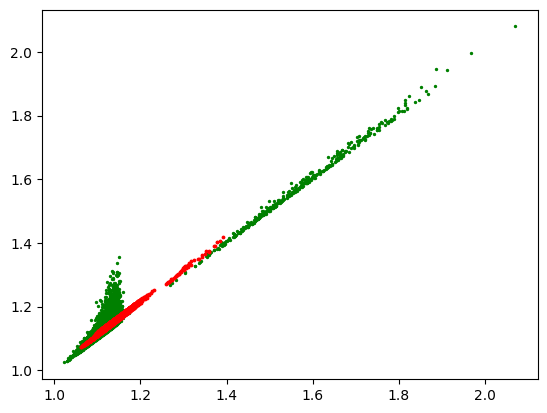

epoch-131, done


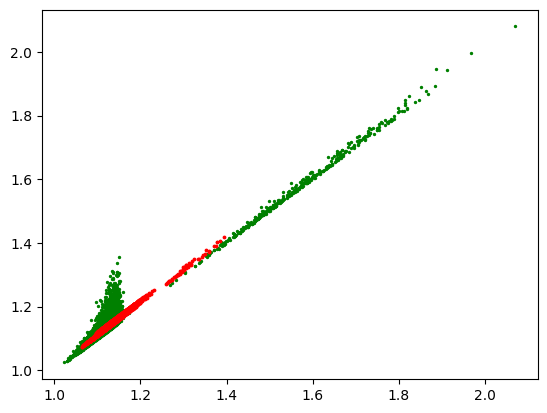

epoch-132, done


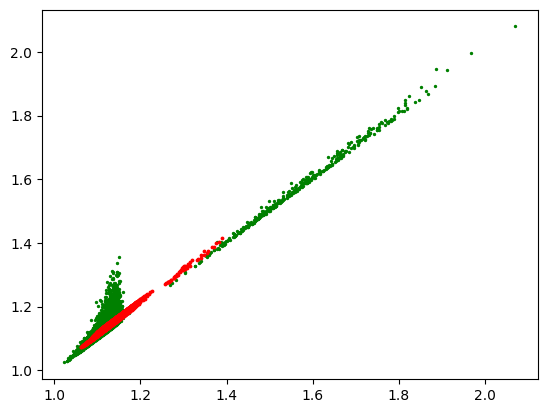

epoch-133, done


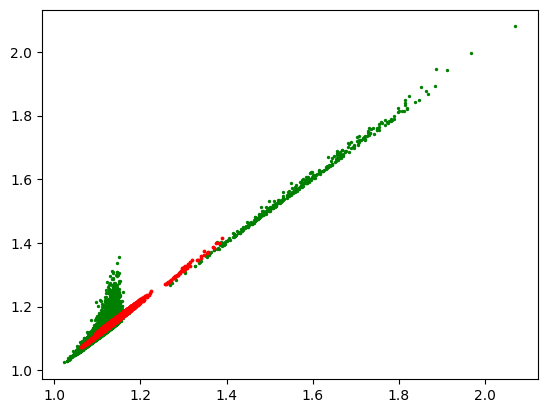

epoch-134, done


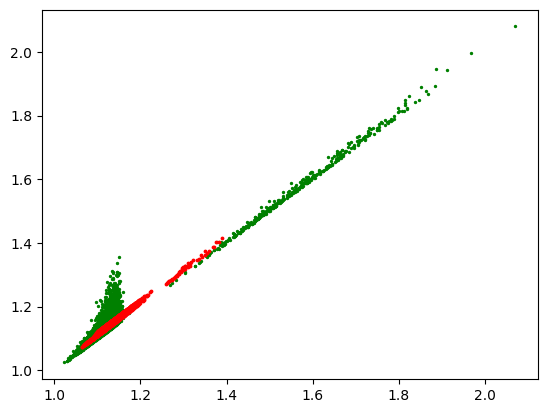

epoch-135, done


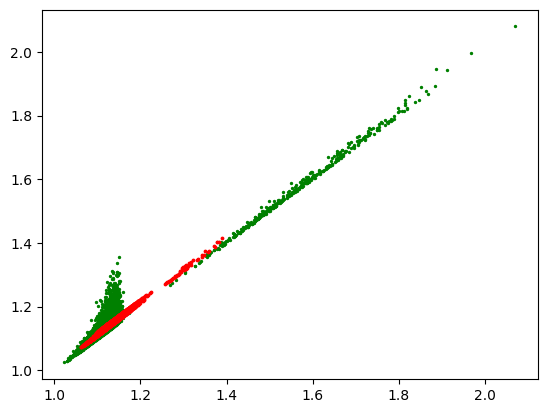

epoch-136, done


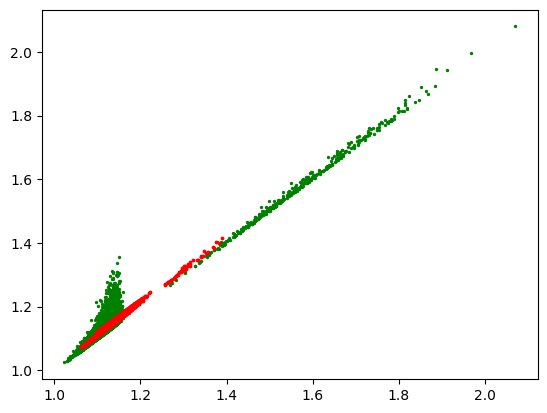

epoch-137, done


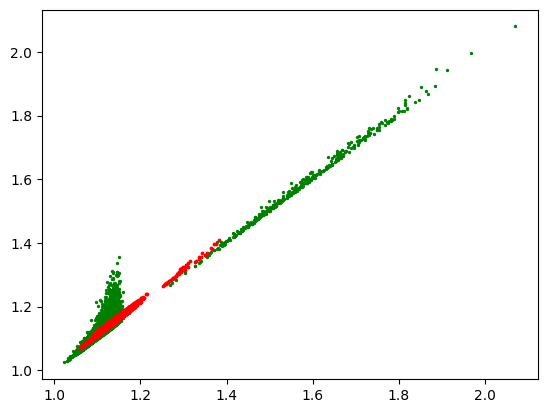

epoch-138, done


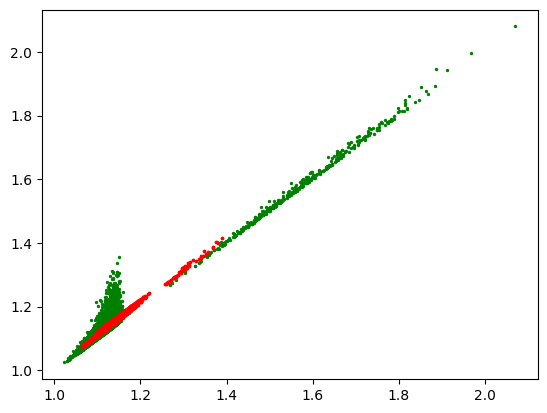

epoch-139, done


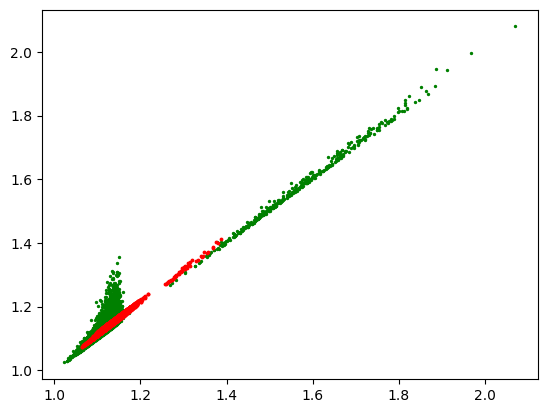

epoch-140, done


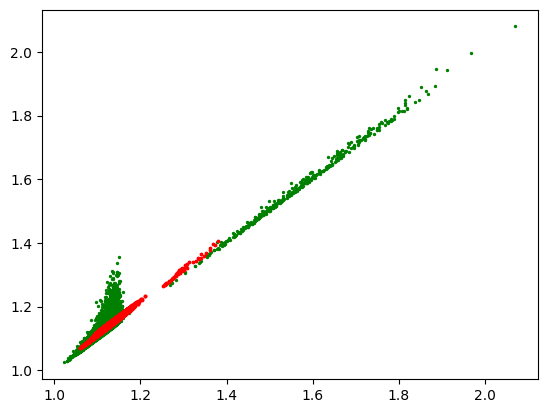

epoch-141, done


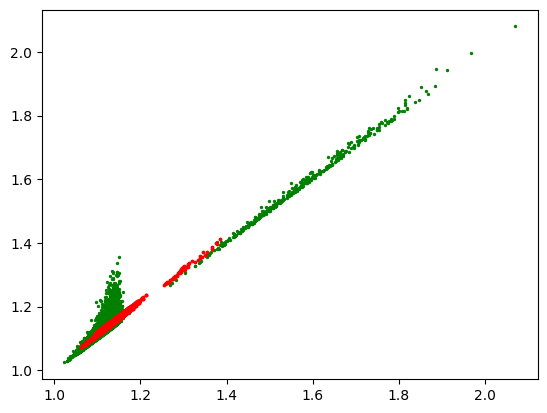

epoch-142, done


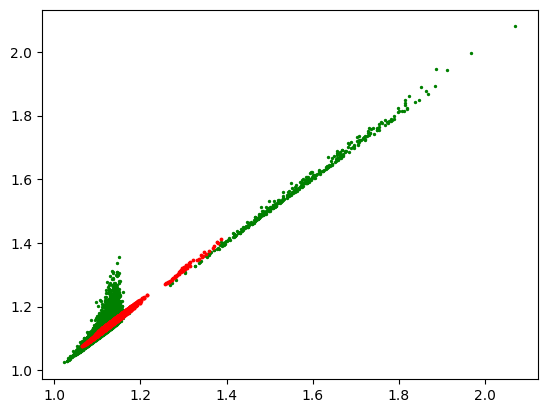

epoch-143, done


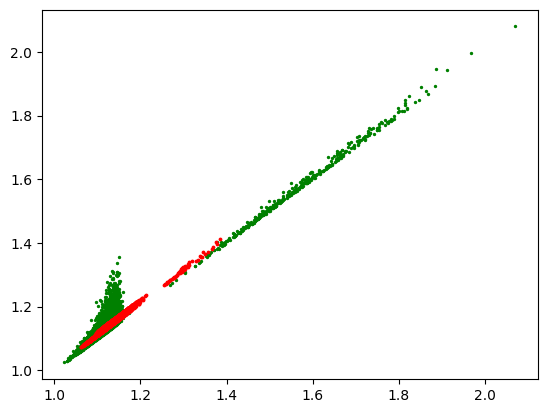

epoch-144, done


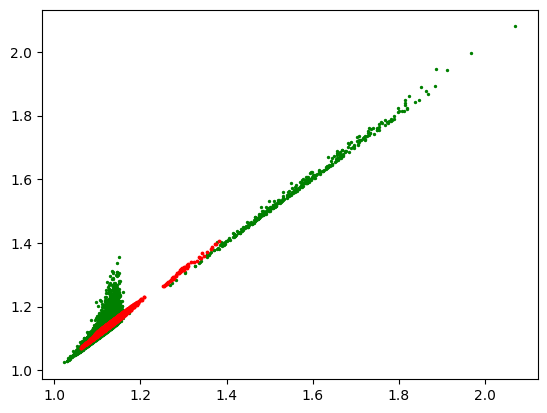

epoch-145, done


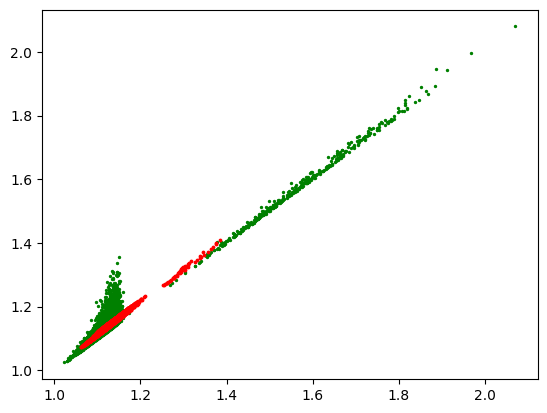

epoch-146, done


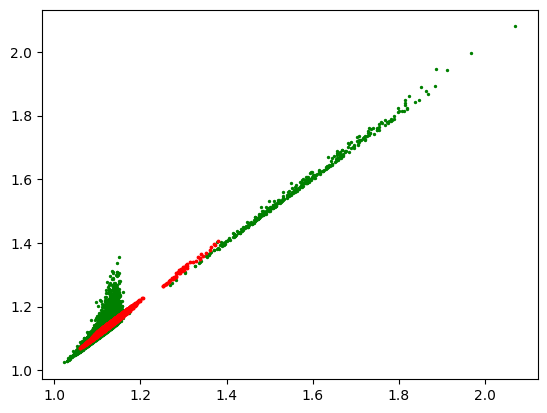

epoch-147, done


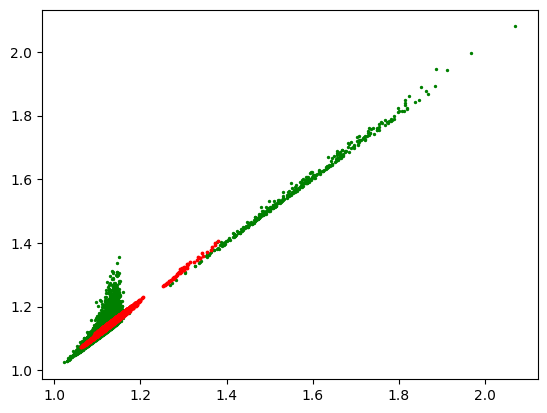

epoch-148, done


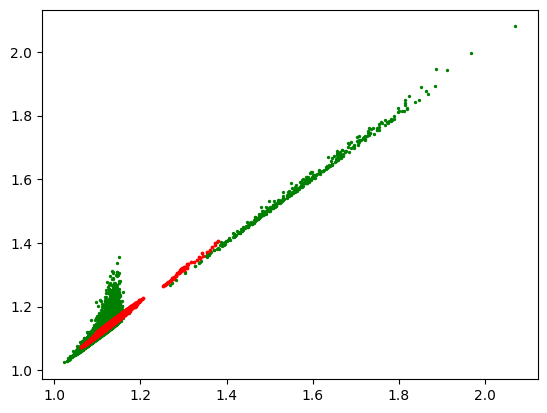

epoch-149, done


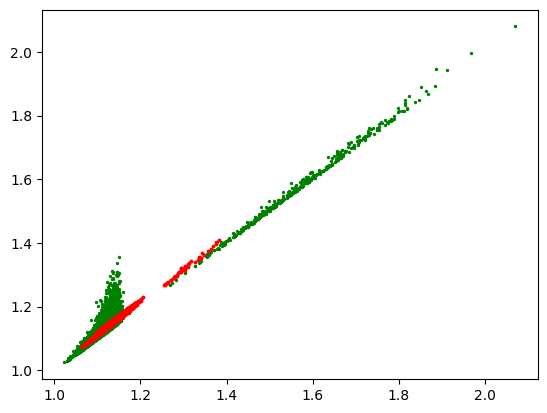

In [17]:
ae = AutoEncoder(False)
ae_trainer = AETrainer(ae)
epochs = 250
plot_data_ae(tensors_circle, ae_trainer.model.forward(torch.stack(tensors_circle)))
plot_data_ae(tensors_torus, ae_trainer.model.forward(torch.stack(tensors_torus)))
losses = ae_trainer.train(tensors_circle, epochs)
#my_plot(np.linspace(1, epochs, epochs).astype(int), losses)

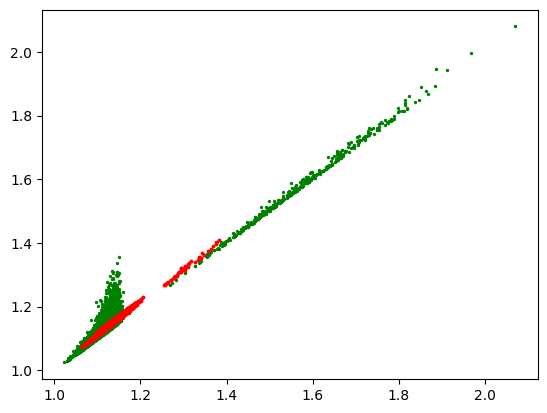

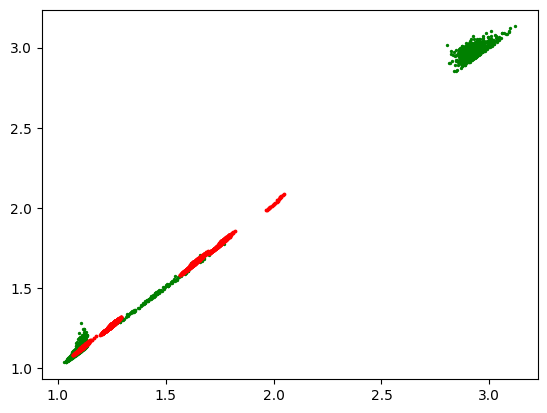

In [18]:
plot_data_ae(tensors_circle, ae_trainer.model.forward(torch.stack(tensors_circle)))
plot_data_ae(tensors_torus, ae_trainer.model.forward(torch.stack(tensors_torus)))

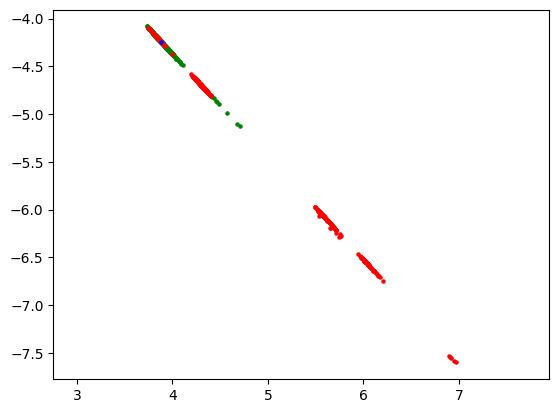

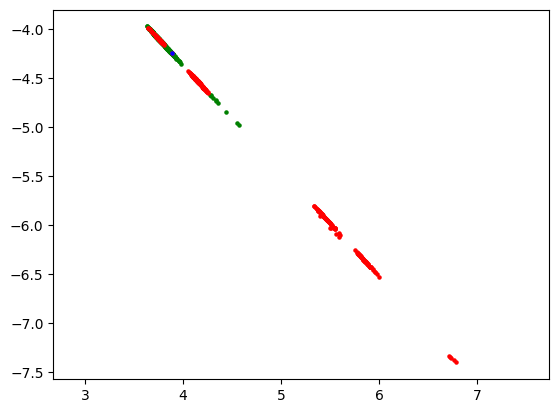

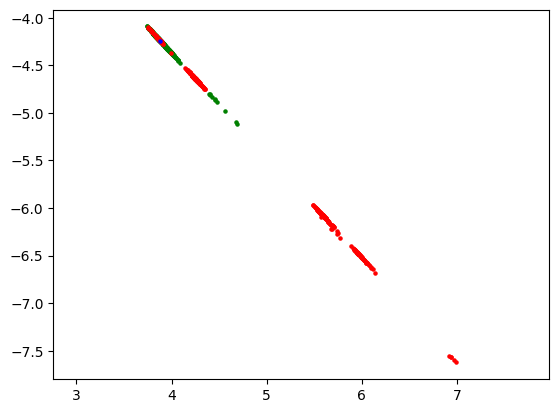

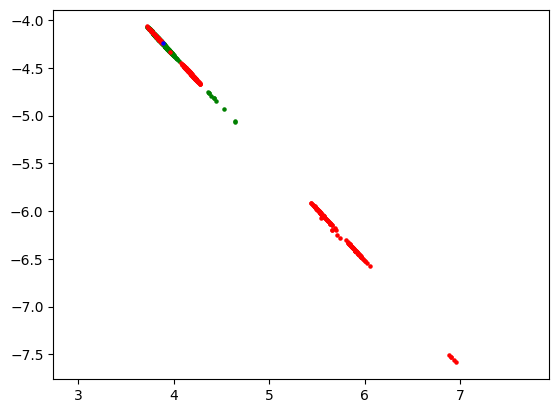

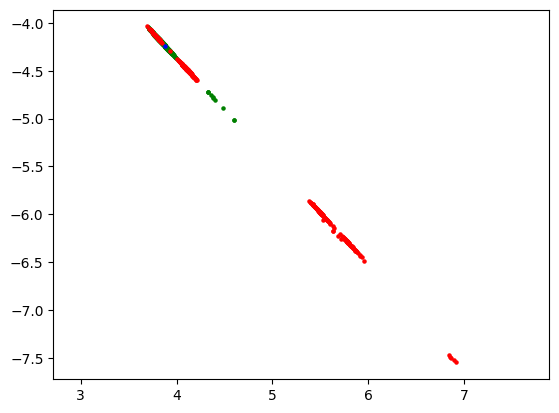

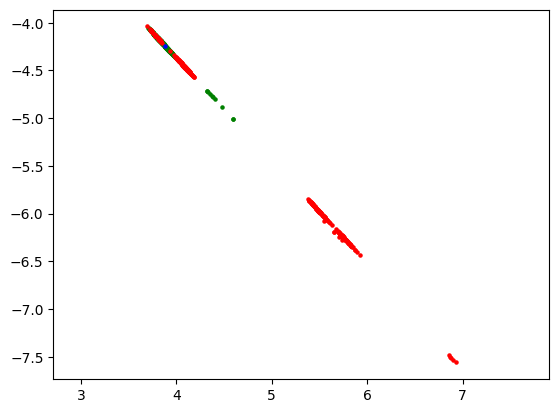

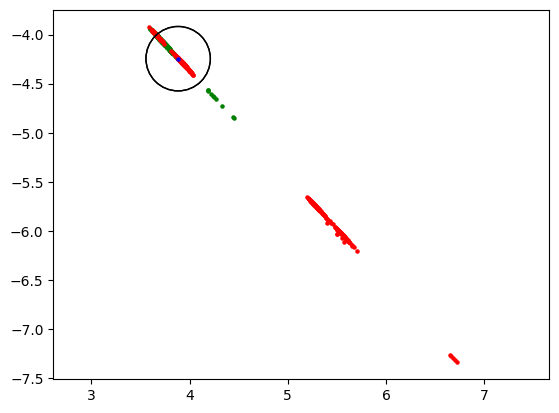

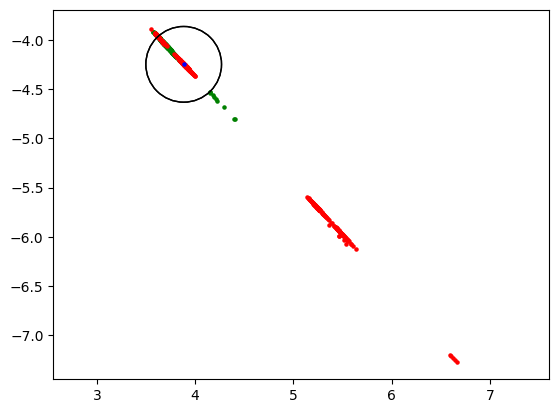

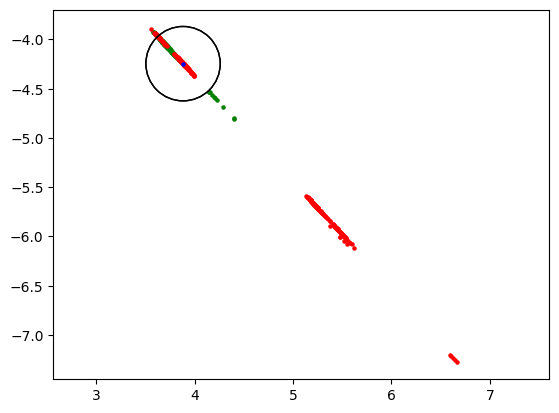

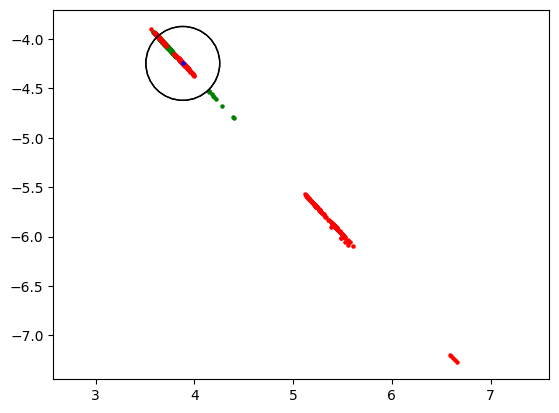

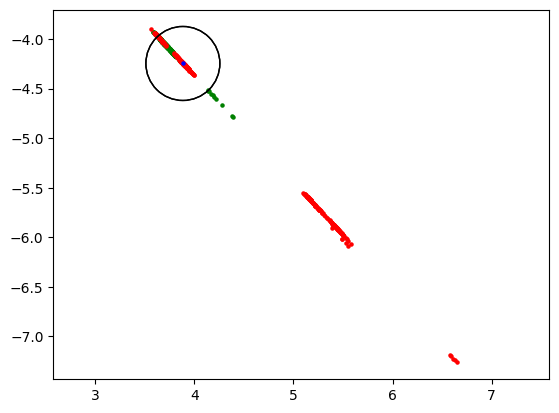

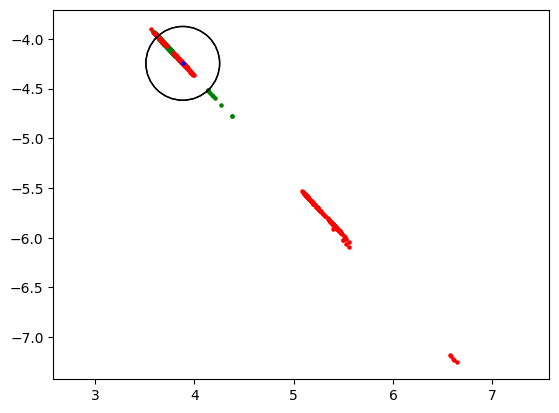

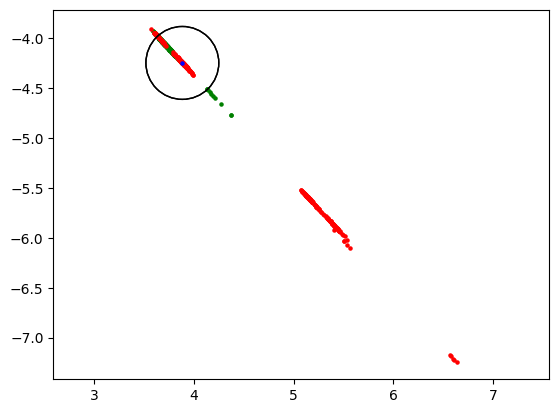

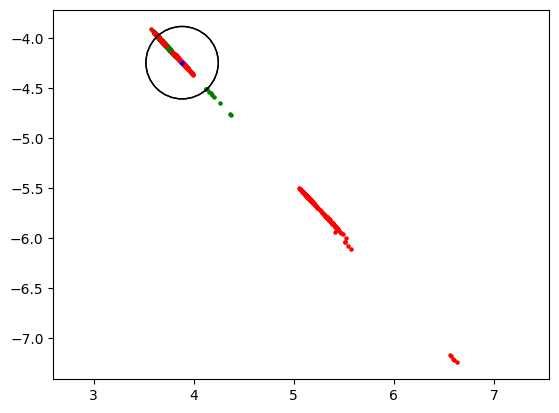

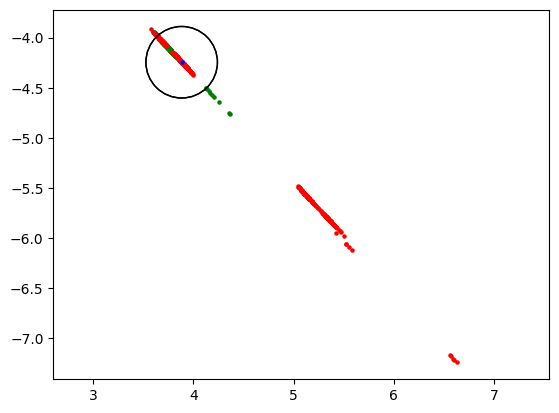

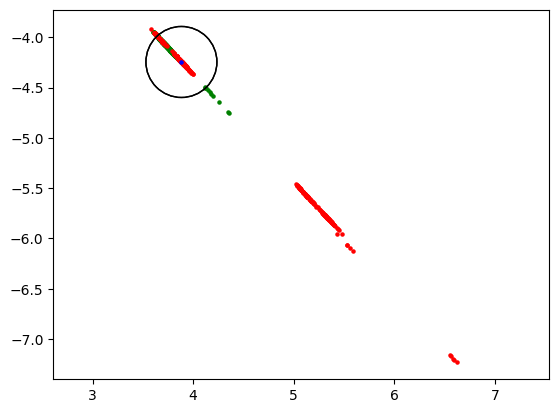

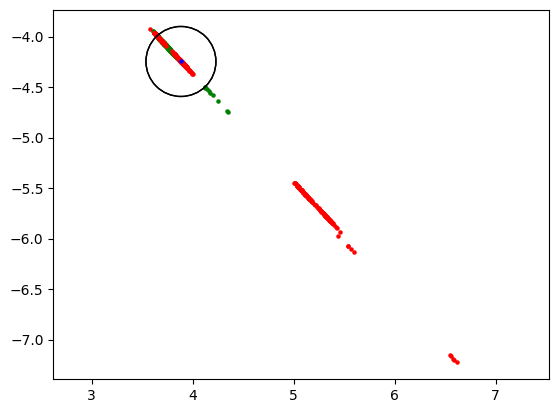

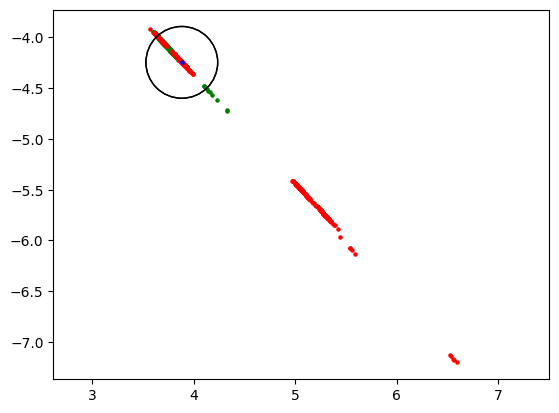

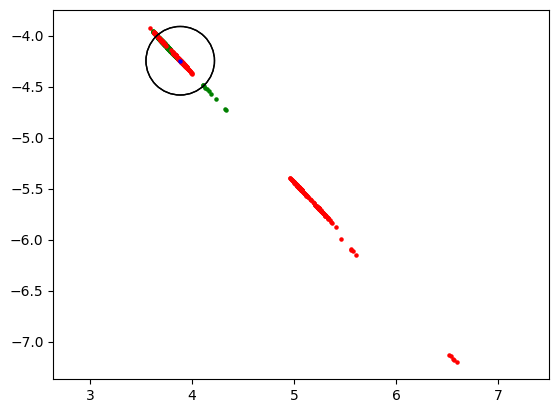

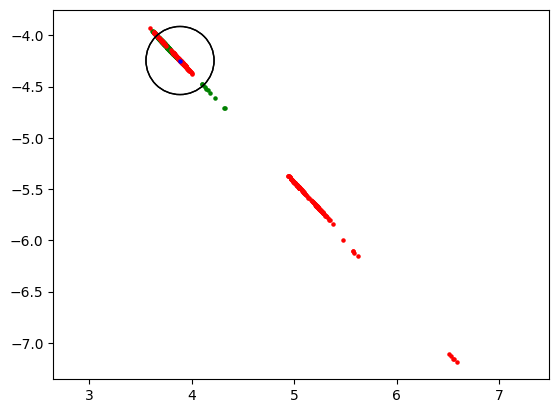

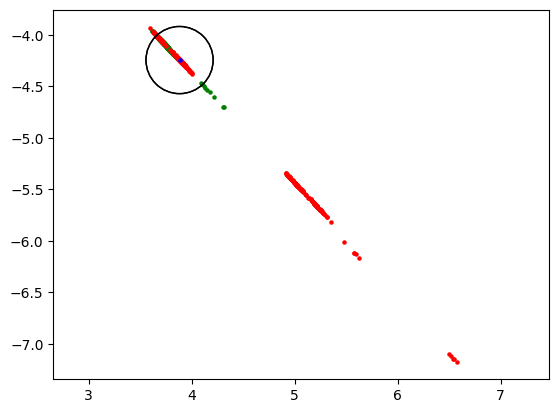

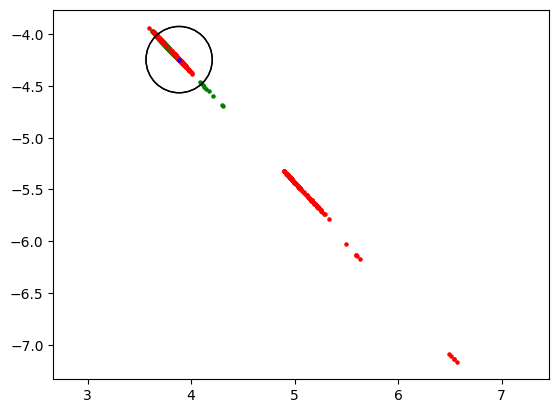

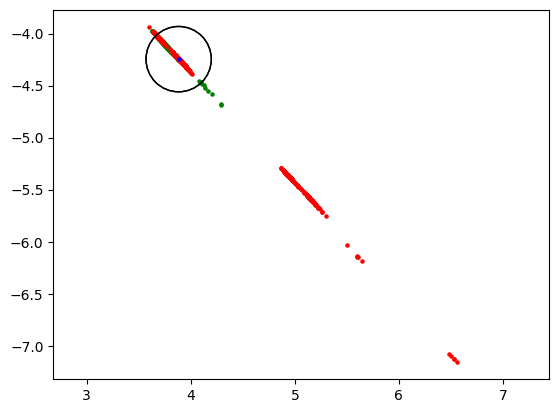

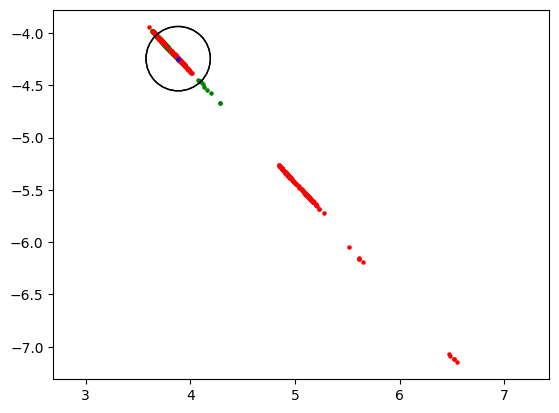

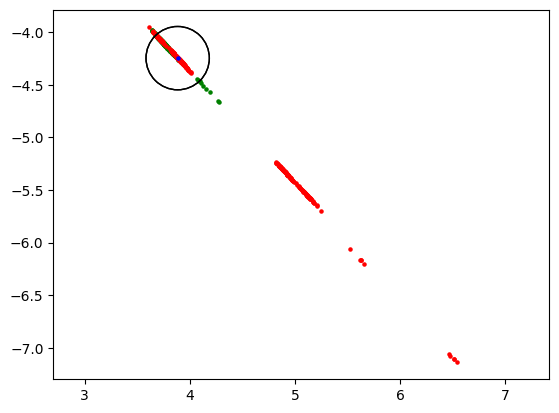

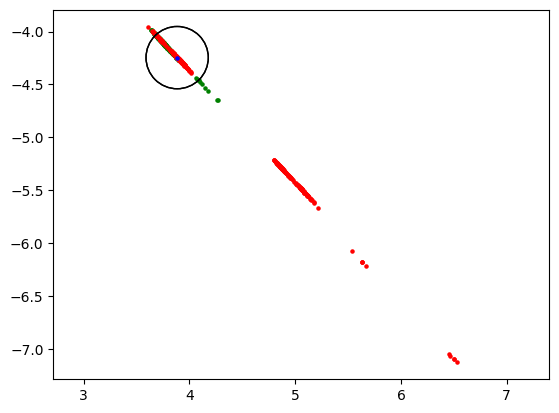

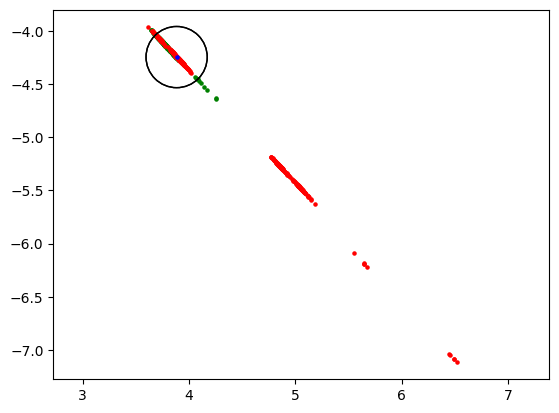

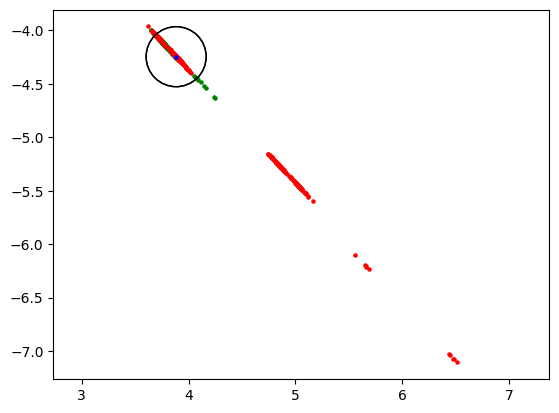

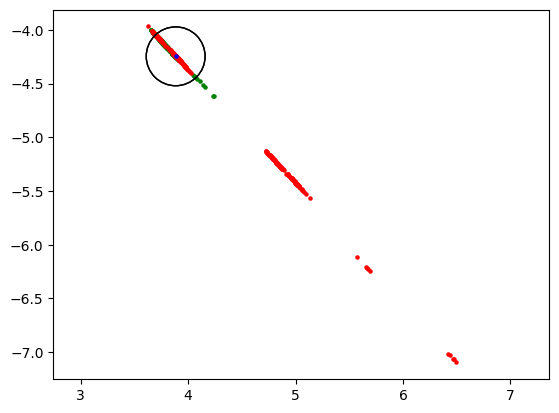

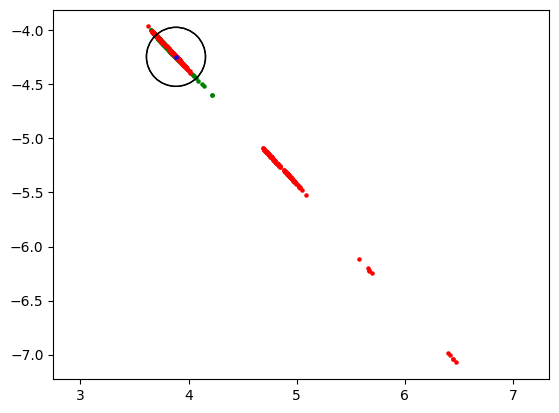

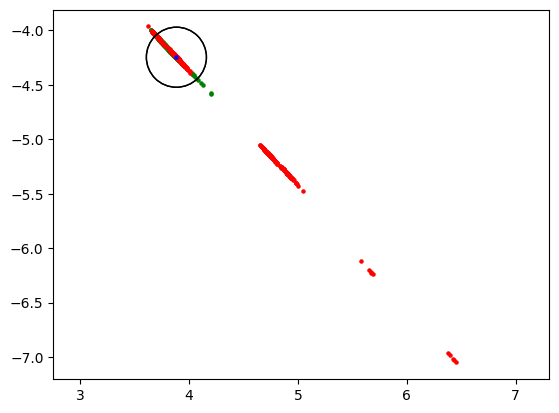

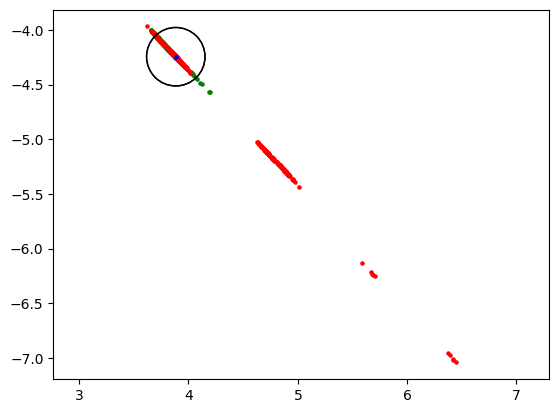

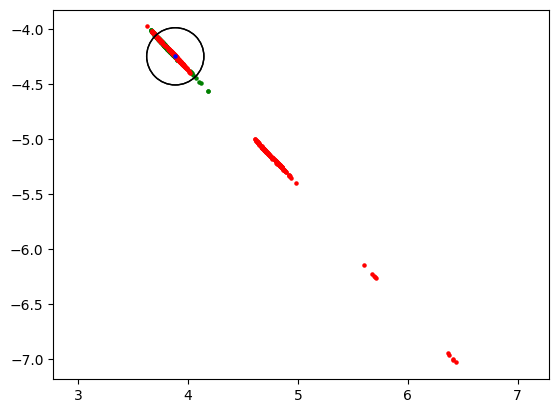

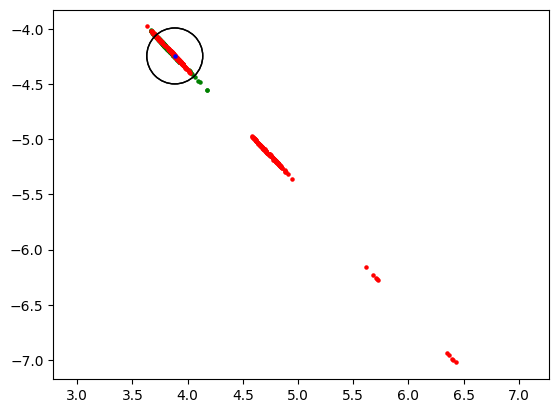

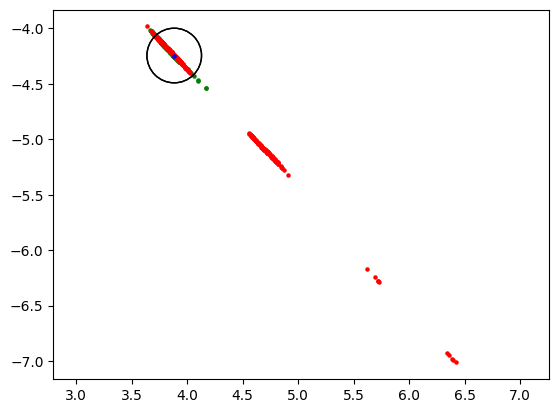

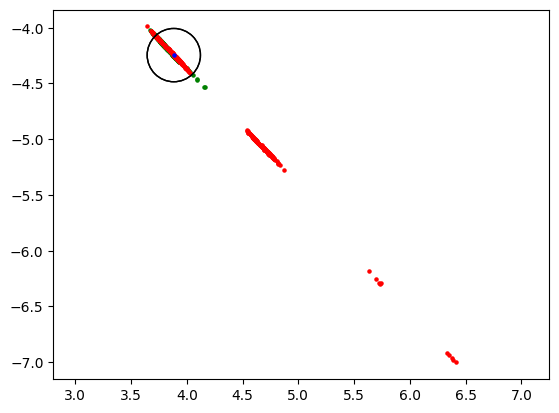

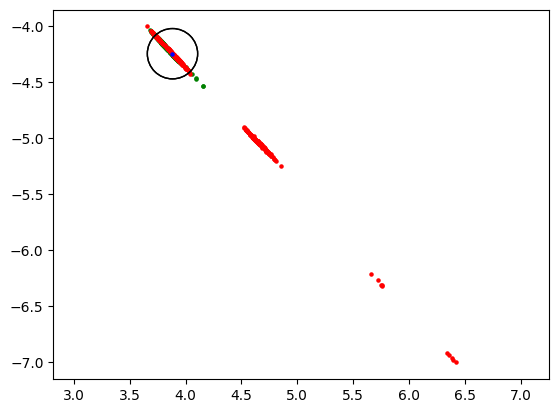

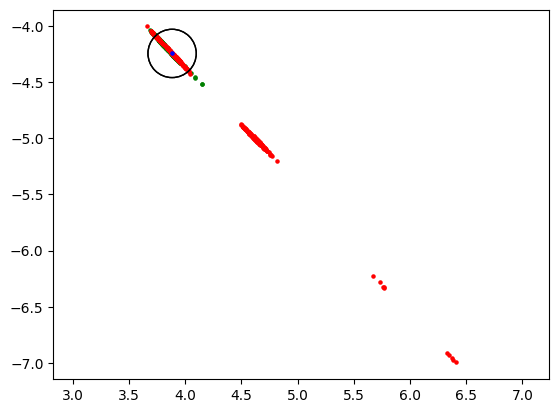

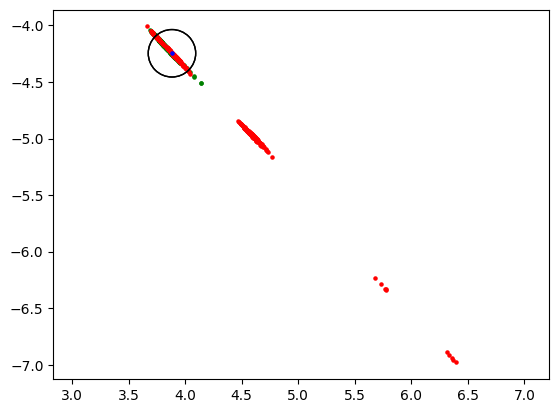

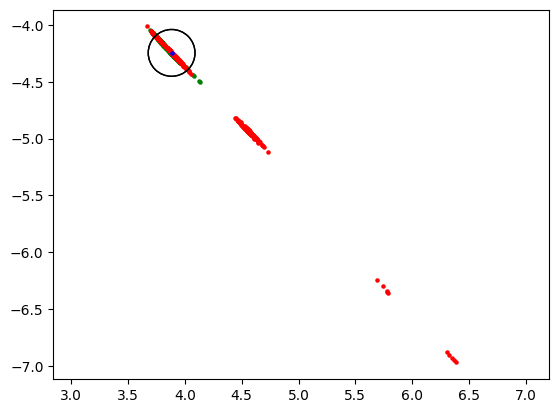

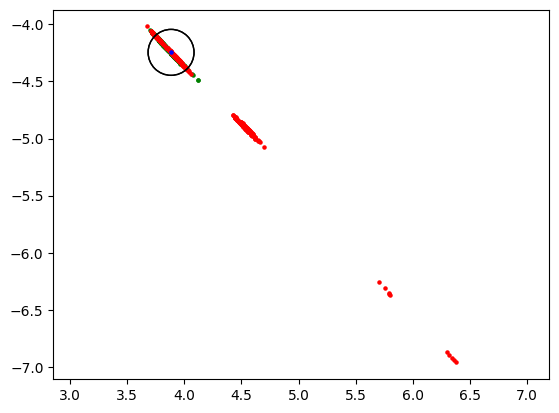

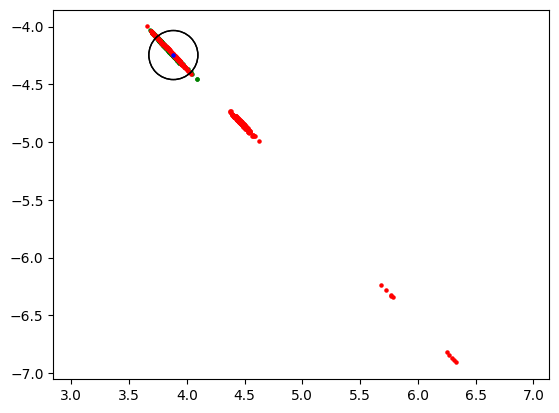

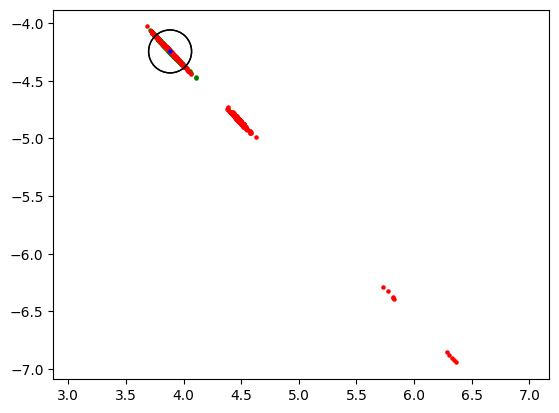

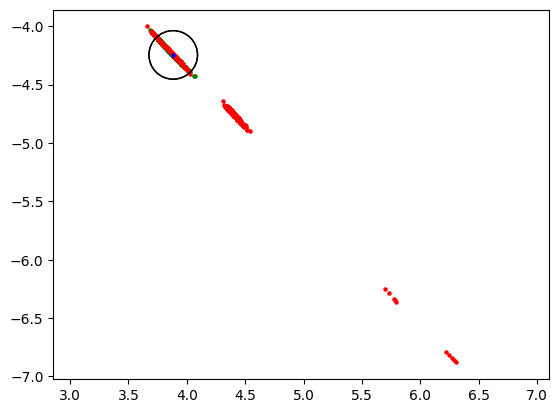

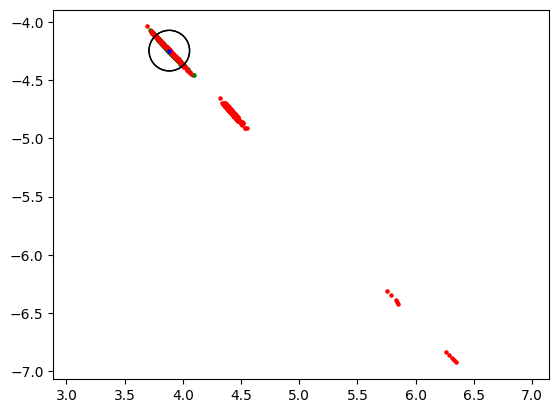

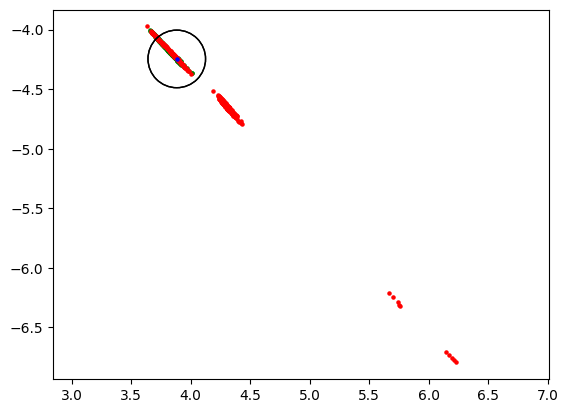

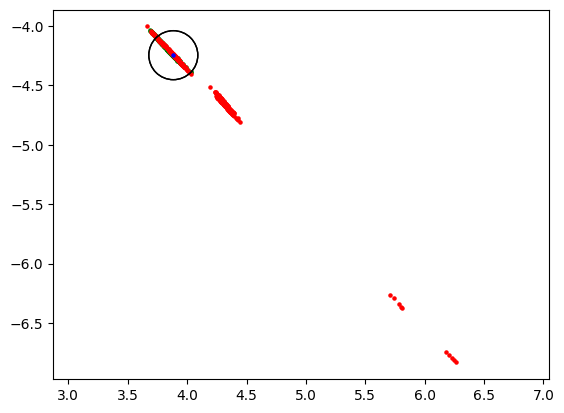

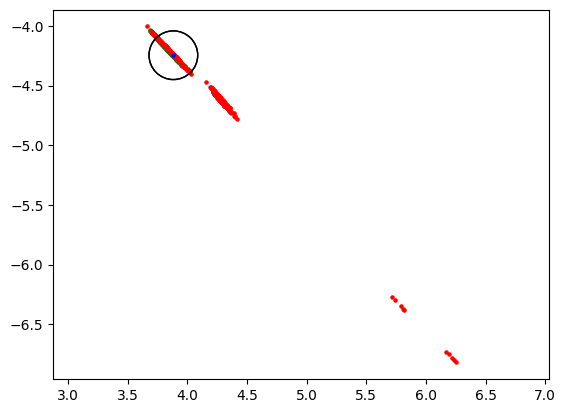

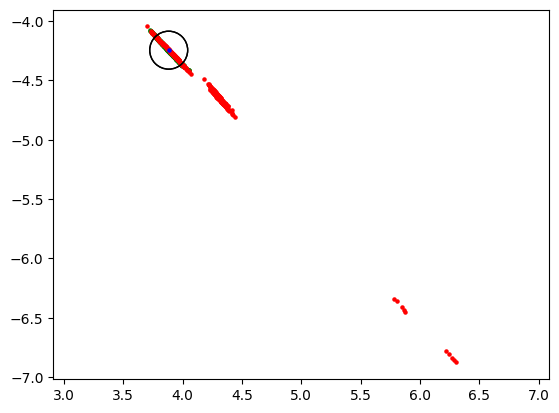

KeyboardInterrupt: 

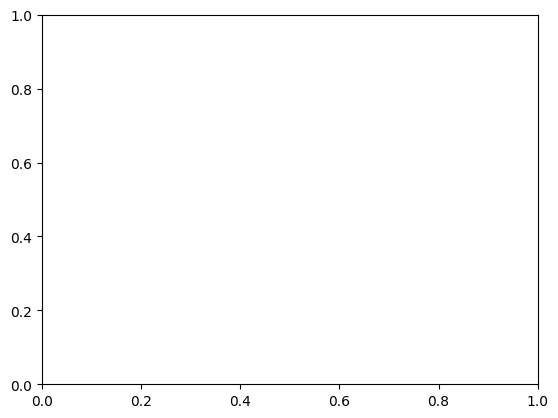

In [25]:
from numpy import sqrt, quantile


class DeepSVDD(nn.Module):
    def __init__(self, autoencoder, bias):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 10, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(10, 5, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(5, 5, bias=bias),
            nn.LeakyReLU(),
            nn.Linear(5, 2, bias=bias),
        ).to(device)
        net_dict = self.state_dict()
        ae_dict = autoencoder.state_dict()
        ae_dict = {k: v for k, v in ae_dict.items() if k in net_dict}
        net_dict.update(ae_dict)
        self.load_state_dict(net_dict)

    def forward(self, x):
        return self.layers(x)


# Trainer can train models for either soft-boundary Deep SVDD or One-Class Deep SVDD
class DeepSVDDTrainer:
    def __init__(self, model, goal, c_size):
        self.model = model
        self.goal = goal
        self.c = torch.tensor([0, 0], dtype=torch.float32, device=device)
        self.R = torch.tensor(0, dtype=torch.float32, device=device)

    def train(self, training_data):
        optimizer = torch.optim.Adam(dsvdd.parameters(), lr=1e-2 / 2, weight_decay=1e-5)
        train_loader = torch.utils.data.DataLoader(list(zip(training_data, training_data)), batch_size=50)
        warmup_epoch = 5
        nu = 0.01

        losses = []

        for epoch in range(50):
            epoch_loss = []
            for data in train_loader:
                inputs, targets = data
                optimizer.zero_grad()
                outputs = dsvdd.forward(inputs)
                dist = torch.sum((outputs - self.c) ** 2, dim=1)
                if self.goal == 'one-class':
                    loss = torch.sum(dist)
                else:
                    scores = dist - self.R ** 2
                    loss = self.R ** 2 + (1 / nu) * torch.mean(torch.max(torch.zeros_like(scores), scores))
                loss.backward()
                optimizer.step()
                epoch_loss.append(loss.item())

                if epoch >= warmup_epoch and self.goal == 'soft-boundary':
                    self.R = torch.tensor(quantile(sqrt(dist.clone().data.cpu().numpy()), 1 - nu), device=device)
            losses.append(sum(epoch_loss) / len(epoch_loss))
            plot(self)
        return losses

    def set_center(self, transformed_data):
        eps = 0.1
        with torch.no_grad():
            self.c = torch.zeros(2, device='cuda')
            for x in transformed_data:
                self.c += dsvdd.forward(x)

            self.c /= len(transformed_data)
            self.c[(abs(self.c) < eps) & (self.c < 0)] = -eps
            self.c[(abs(self.c) < eps) & (self.c > 0)] = eps

    # First copy weights from autoencoder to DeepSVDD network


#mixin outliers with transformed data


dsvdd = DeepSVDD(ae, False)
dsvdd_trainer = DeepSVDDTrainer(dsvdd, 'soft-boundary', 2)
dsvdd_trainer.set_center(tensors_circle)
plot(dsvdd_trainer)
dsvdd_trainer.train(tensors_circle)


# Try something else with persistence landscapes

In [26]:
def in_sphere(c, r, vec):
    return np.sum((c.cpu().detach().numpy() - vec.cpu().detach().numpy()) ** 2) < r ** 2


points = dsvdd_trainer.model.forward(torch.stack(tensors_torus))

is_in_sphere = 0
not_in_sphere = 0

for p in points:
    if in_sphere(dsvdd_trainer.c, dsvdd_trainer.R, p):
        is_in_sphere += 1
    else:
        not_in_sphere += 1

print(is_in_sphere)
print(not_in_sphere)

319
181


In [21]:
points = dsvdd_trainer.model.forward(torch.stack(tensors_circle))

is_in_sphere = 0

for p in points:
    if in_sphere(dsvdd_trainer.c, dsvdd_trainer.R, p):
        is_in_sphere += 1

print(is_in_sphere)

994


In [ ]:
# Instantiate datasets
data_torus = torus(n=100, c=2, a=1)
data_sphere = sphere(n=100, r=2)

print(data_torus)
print(data_sphere)

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim=2)
# Compute persistence diagrams
dgms_torus = rips.fit_transform(data_torus)
dgms_sphere = rips.fit_transform(data_sphere)


In [ ]:
import persim.landscapes
import persim
# Import TDA utilities
from ripser import Rips

rips = Rips(maxdim=2)
#circle_landscaper = persim.landscapes.PersistenceLandscaper(hom_deg=1, start=0, stop=2.0, num_steps=500, flatten=True)
#torus_landscaper = persim.landscapes.PersistenceLandscaper(hom_deg=1, start=0, stop=2.0, num_steps=500, flatten=True)

landscapes_circle = []
landscapes_torus = []

for i in range(100):
    # Resample data
    _data_torus = torus(n=100, c=2, a=1)
    _data_sphere = sphere(n=100, r=2)

    # Compute persistence diagrams
    dgm_torus = rips.fit_transform(_data_torus)

    # Instantiate persistence landscape transformer
    torus_landscaper = persim.landscapes.PersistenceLandscaper(hom_deg=1, start=0, stop=2.0, num_steps=500,
                                                               flatten=True)

    # Compute flattened persistence landscape
    torus_flat = torus_landscaper.fit_transform(dgm_torus)

    landscapes_torus.append(torus_flat)

    # Compute persistence diagrams
    dgm_sphere = rips.fit_transform(_data_sphere)

    # Instantiate persistence landscape transformer
    sphere_landscaper = persim.landscapes.PersistenceLandscaper(hom_deg=1, start=0, stop=2.0, num_steps=500,
                                                                flatten=True)

    # Compute flattened persistence landscape
    sphere_flat = sphere_landscaper.fit_transform(dgm_sphere)

    landscapes_circle.append(sphere_flat)
